In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_excel('WEOOct2024all.xlsx')
df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1101.445,1032.712,1060.708,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,...,-14.542,-6.24,2.711,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1251.172,1283.442,1357.275,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,14.278,14.501,17.329,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,85.768,86.149,91.668,NaN,NaN,NaN,NaN,NaN,NaN,2024.0


# Part 1: Value Trading Strategy Case Study

As we discussed in class on October 10, **Value trading** is a known quantity in both discretionary and systematic styles alike; Warren Buffet is perhaps best known for his approach to buying long-term investments. We are going to work through an example of this in the systematic format and build a case-study of a “quant-trading” strategy in the context of the factor/risk premia work we were doing.



## Step 1: Download Data
Go to the IMF website and navigate to the **WEO data**. Download all data so you can see the full file by all countries; it should look something like the below. Spend a little time and describe the data to us. Thinking back to the class on data methods, what is the most effective way to communicate the intent, use, as well as flaws in the series. One of the most valued skills in a job market where there is so much technical fluency is how to actually present information in a meaningful, concise way. I would think about how to give the fullest description without leaning on 100 histograms and pages of text. Put your executive hats on!

In [ ]:
## Download the data
df = pd.read_excel('WEOOct2024all.xlsx')
df.columns = df.columns.astype(str)
df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1101.445,1032.712,1060.708,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,...,-14.542,-6.24,2.711,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1251.172,1283.442,1357.275,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,14.278,14.501,17.329,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,85.768,86.149,91.668,NaN,NaN,NaN,NaN,NaN,NaN,2024.0


In [ ]:
df.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029',
       'Estimates Start After'],
      dtype='object')

In [ ]:
## create df with indicators + descriptions
pd.set_option('display.max_rows', None)
df_desc = df[['WEO Subject Code', 'Subject Descriptor',	'Subject Notes',	'Units',	'Scale']].drop_duplicates()
df_desc.head()

,WEO Subject Code,Subject Descriptor,Subject Notes,Units,Scale
0,NGDP_R,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions
1,NGDP_RPCH,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units
2,NGDP,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions
3,NGDPD,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions
4,PPPGDP,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions


In [ ]:
# Ensure years columns are identified correctly
years_columns = [str(year) for year in range(1980, 2030)]

# Filter to keep only relevant columns: Country, Yearly Data, and Metric of Interest
df = df[['Country', 'WEO Subject Code', 'Subject Descriptor'] + years_columns]

# Melt the DataFrame so that 'year' becomes a feature
df_melted = df.melt(id_vars=['Country', 'WEO Subject Code', 'Subject Descriptor'],
                    value_vars=years_columns,
                    var_name='Year',
                    value_name='Value')

In [ ]:
df_melted[df_melted['Country'] == 'United Kingdom'].head()

,Country,WEO Subject Code,Subject Descriptor,Year,Value
8140,United Kingdom,NGDP_R,"Gross domestic product, constant prices",1980,1059.66
8141,United Kingdom,NGDP_RPCH,"Gross domestic product, constant prices",1980,-2.05
8142,United Kingdom,NGDP,"Gross domestic product, current prices",1980,259.97
8143,United Kingdom,NGDPD,"Gross domestic product, current prices",1980,604.697
8144,United Kingdom,PPPGDP,"Gross domestic product, current prices",1980,528.578


This plot gives us an idea of the type of data we are working with. We have many countries and several economic indicators from 1980-Present. We also have projections for years beyond 2024. While we've only chosen 4 countries, we can see how economic conditions vary widely between 'developed' countries and 'developing' countries. NGDPDPC is GDP per capita, as expressed in USD ($) and we see how the United States tends to significantly outperform the likes of India and Algeria, which makes sense. Though the U.S. and France we similar in terms of GDP per capita until 2010 or so, the U.S. seems to have separated themselves in that regard.

We can also notice that the underdeveloped countries tend to have greater implied PPP (PPPEX), greater unemployment (LUR), and greater yearly inflation (PCPIPCH). This suggests more robust economic conditions for countries like the U.S. and France.

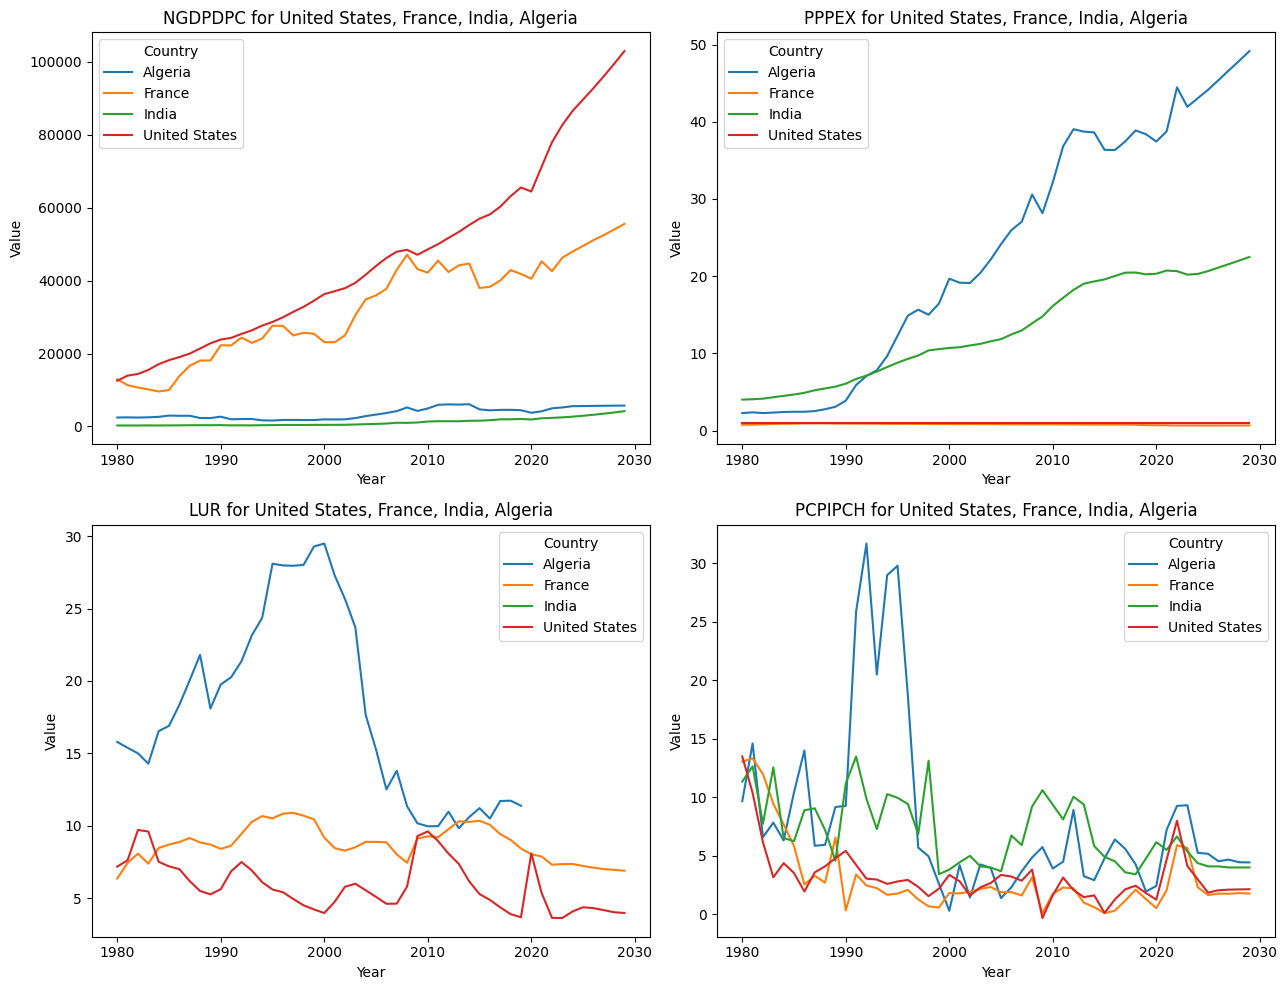

In [ ]:
# Replace '--' or any non-numeric values with NaN
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
# make year numeric
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')

def plot_metrics(df, metrics, countries):
    # Set up the subplot grid dimensions
    n_cols = 2
    n_rows = (len(metrics) + 1) // 2  # Rows based on the number of metrics and columns

    # Adjust figure size
    plt.figure(figsize=(13, 5 * n_rows))

    # Iterate over each metric and create a subplot
    for i, metric in enumerate(metrics):
        # Filter DataFrame by metric
        df_metric = df[df['WEO Subject Code'] == metric]

        # Select the subplot
        plt.subplot(n_rows, n_cols, i + 1)

        # Create line plot
        sns.lineplot(
            data=df_metric[df_metric['Country'].isin(countries)],
            x='Year',
            y='Value',
            hue='Country'
        )

        # Set the title and improve layout
        plt.title(f"{metric} for {', '.join(countries)}")
        plt.xlabel("Year")
        plt.ylabel("Value")



    # Show the plots
    plt.tight_layout()
    plt.show()

# Usage
## reassign clean df
df_clean = df_melted
metrics = ['NGDPDPC', 'PPPEX', 'LUR', 'PCPIPCH']
countries = ['United States', 'France', 'India', 'Algeria']
plot_metrics(df_melted, metrics, countries)

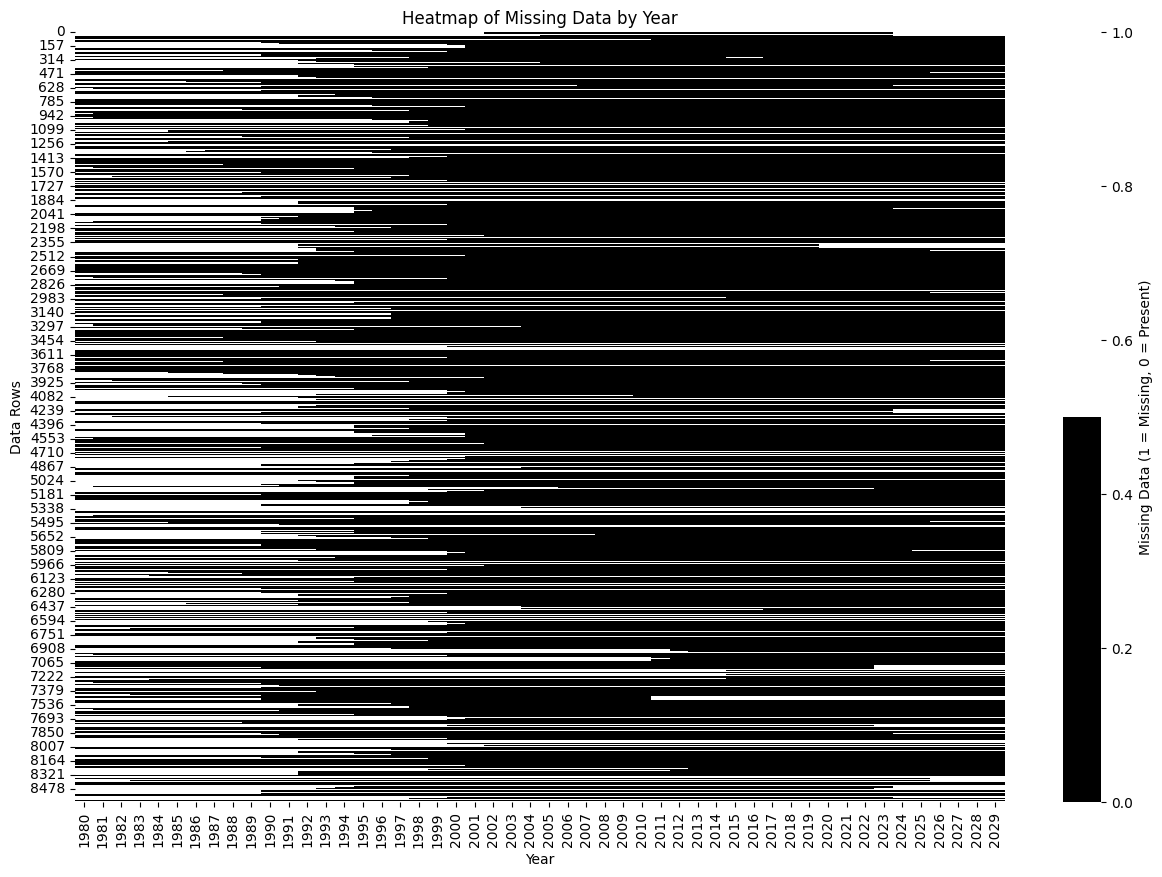

In [ ]:
### Note that this uses non-formatted dataframe; probably don't use this for analysis
# Select only the year columns from the original DataFrame
## Download the data
df = pd.read_excel('WEOOct2024all.xlsx')
df.columns = df.columns.astype(str)
df.head()
years = df.columns[df.columns.str.isnumeric()]

# Create a new DataFrame with missing value indicators (True for NaN, False otherwise)
missing_data = df[years].isna()

# Set up the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(missing_data, cmap=["black", "white"], cbar_kws={'label': 'Missing Data (1 = Missing, 0 = Present)'})

# Labeling
plt.title('Heatmap of Missing Data by Year')
plt.xlabel('Year')
plt.ylabel('Data Rows')

plt.show()

### TO-DO: Add Description


!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Part 2
## Step 1: Focus on Implied PPP
The subset we are interested in is the **Implied PPP**. Condense the filter and create a time series that is usable for a proof of concept.

### What is Purchasing Power Parity?
At its core, **Purchasing Power Parity (PPP)** is a theory which suggests that in the long run, exchange rates should move towards the rate that would equalize the prices of an identical basket of goods and services in any two countries.

### Trading Signal Based on PPP
In short form, what would a trading signal on this look like? Consider if the actual exchange rate deviates significantly from the PPP rate:
- If the base currency is **undervalued** (market rate below PPP), you might consider a **buy signal**.
- If the base currency is **overvalued** (market rate above PPP), you might consider a **sell signal**.

In [ ]:
df_clean.head()

,Country,WEO Subject Code,Subject Descriptor,Year,Value
0,Afghanistan,NGDP_R,"Gross domestic product, constant prices",1980,NaN
1,Afghanistan,NGDP_RPCH,"Gross domestic product, constant prices",1980,NaN
2,Afghanistan,NGDP,"Gross domestic product, current prices",1980,NaN
3,Afghanistan,NGDPD,"Gross domestic product, current prices",1980,NaN
4,Afghanistan,PPPGDP,"Gross domestic product, current prices",1980,NaN


In [ ]:
df_clean["WEO Subject Code"].unique()

array(['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D',
       'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC',
       'NGAP_NPGDP', 'PPPSH', 'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI',
       'PCPIPCH', 'PCPIE', 'PCPIEPCH', 'TM_RPCH', 'TMG_RPCH', 'TX_RPCH',
       'TXG_RPCH', 'LUR', 'LE', 'LP', 'GGR', 'GGR_NGDP', 'GGX',
       'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP', 'GGSB', 'GGSB_NPGDP',
       'GGXONLB', 'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG',
       'GGXWDG_NGDP', 'NGDP_FY', 'BCA', 'BCA_NGDPD', nan], dtype=object)

In [ ]:
## filter for only 'PPPEX' (i.e. implied PPP)

ppp_data = df_clean[df_clean['WEO Subject Code'] == 'PPPEX']

# Step 2: Create a usable time series
ppp_time_series = ppp_data[['Country', 'Year', 'Value']]

# Step 3: Pivot the DataFrame
## now all data is PPPEX, each column is a country
ppp_df = ppp_time_series.pivot(index='Year', columns='Country', values='Value')

# Step 4: handle missing values
ppp_df.fillna(method='ffill', inplace=True)  # Forward fill as an example

ppp_df.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1980,NaN,3.241,2.264,NaN,NaN,1.525,NaN,NaN,NaN,0.940,...,1.0,0.008,NaN,76.233,NaN,0.231,NaN,NaN,NaN,NaN
1981,NaN,2.898,2.366,NaN,NaN,1.514,NaN,NaN,NaN,0.945,...,1.0,0.009,NaN,80.561,NaN,0.280,NaN,NaN,NaN,NaN
1982,NaN,2.731,2.271,NaN,NaN,1.590,NaN,NaN,NaN,0.998,...,1.0,0.010,NaN,82.015,NaN,0.527,NaN,NaN,NaN,NaN
1983,NaN,2.627,2.334,NaN,NaN,1.613,NaN,NaN,NaN,1.044,...,1.0,0.014,NaN,81.135,NaN,0.758,NaN,NaN,0.001,NaN
1984,NaN,2.454,2.409,NaN,NaN,1.622,NaN,NaN,NaN,1.068,...,1.0,0.022,NaN,87.837,NaN,1.206,NaN,NaN,0.001,NaN


## Description of PPP, Possible Trade Signal

Purchasing Power Parity, or PPP, is a metric that calculates where the theoretical exhange rate should be. It can be very valuable when deciding if a currency is undervalued relative to another.

As such, a possible trading signal, albeit simple, could be when the market exchange rate (or spot rate) deviates far from the PPP. For instance, if the market rate is much lower than the spot rate it suggests the base currency is undervalued, so we should buy more of it. The opposite case also exists.

**Creating the Signal Rule:**

Use the deviation percentage as a straightforward trigger. For example:


*  If (Actual Rate - PPP Rate) / PPP Rate > Threshold, then consider selling GBP (overvalued).
*  If (Actual Rate - PPP Rate) / PPP Rate < -Threshold, then consider buying GBP (undervalued).



For simplicity, let's assume a threshold of 0.05 or 5%.

## Step 2: Backtest with GBPUSD Spot Data
Consider the GBPUSD spot time series provided to you in the file. Let us assume that it is tradable for now. Construct a simple backtest equity curve based on your rule above. Don’t worry about performance at this point.

**Note**: Pay attention to the availability of the data and the subsequent tradability of the series. In short, when does the report get published? (+2 extra points if a team can find the correct release dates to show it incorporated accurately; otherwise, use a defensible estimate based on some cursory research)

In [ ]:
bbg_data = pd.read_excel('MP2.Data.From.BBG.xlsx')

## extract GB and USD PPP data
ppp_us_gb = ppp_df[['United States', 'United Kingdom']]

bbg_data['Year'] = bbg_data['Date'].dt.year

# Merge bbg_data with ppp_us_gb on 'Year'
# Since 'ppp_us_gb' index is 'Year', reset it to use it as a column
ppp_us_gb = ppp_us_gb.reset_index().rename(columns={'index': 'Year'})

# Perform the merge based on the 'Year' column
merged_df = bbg_data.merge(ppp_us_gb, on='Year', how='left')

In [ ]:
merged_df.head()

,Date,GBPUSD,Year,United States,United Kingdom
0,2000-01-03,1.6362,2000,1.0,0.665
1,2000-01-04,1.6360,2000,1.0,0.665
2,2000-01-05,1.6426,2000,1.0,0.665
3,2000-01-06,1.6474,2000,1.0,0.665
4,2000-01-07,1.6393,2000,1.0,0.665


In [ ]:
## reperformed merge with ACTUAL dates
# Full WEO release dates with corresponding PPP year
weo_release_dates = pd.DataFrame({
    'ReleaseDate': pd.to_datetime([
        '1999-09-22', '2000-09-19', '2001-09-26', '2002-09-25', '2003-09-21', '2004-09-22', '2005-09-21',
        '2006-09-14', '2007-10-17', '2008-10-08', '2009-10-01', '2010-10-06', '2011-09-20',
        '2012-10-09', '2013-10-08', '2014-10-07', '2015-10-06', '2016-10-04', '2017-10-10',
        '2018-10-09', '2019-10-11', '2020-10-13', '2021-10-12', '2022-10-11', '2023-10-05',
        '2024-10-22'
    ]),
    'PPPYear': [
        1999,2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020, 2021, 2022, 2023,
        2024
    ]
})

# Define the end of each period (one day before the next release)
weo_release_dates['EndDate'] = weo_release_dates['ReleaseDate'].shift(-1) - pd.Timedelta(days=1)
weo_release_dates.iloc[-1, weo_release_dates.columns.get_loc('EndDate')] = pd.Timestamp('2099-12-31')  # Set last EndDate arbitrarily far in the future

# Generate a daily date range for all possible dates, mapping each to the correct PPPYear
date_to_ppp_year = pd.DataFrame({
    'Date': pd.date_range(start=weo_release_dates['ReleaseDate'].min(), end=weo_release_dates['EndDate'].max())
})
date_to_ppp_year['PPPYear'] = date_to_ppp_year['Date'].apply(
    lambda d: weo_release_dates.loc[(weo_release_dates['ReleaseDate'] <= d) & (d <= weo_release_dates['EndDate']), 'PPPYear'].values[0]
)



# Example of merging this mapping with bbg_data
bbg_data = bbg_data.merge(date_to_ppp_year, on='Date', how='left')


ppp_us_gb = ppp_us_gb.rename(columns={'Year': 'PPPYear'})

# Merge `bbg_data` with PPP data based on 'PPPYear'
merged_df = bbg_data.merge(ppp_us_gb, on='PPPYear', how='left')

merged_df.head()

,Date,GBPUSD,Year,PPPYear,United States,United Kingdom
0,2000-01-03,1.6362,2000,1999,1.0,0.673
1,2000-01-04,1.6360,2000,1999,1.0,0.673
2,2000-01-05,1.6426,2000,1999,1.0,0.673
3,2000-01-06,1.6474,2000,1999,1.0,0.673
4,2000-01-07,1.6393,2000,1999,1.0,0.673


In [ ]:
merged_df.tail()

,Date,GBPUSD,Year,PPPYear,United States,United Kingdom
6459,2024-10-04,1.3122,2024,2023,1.0,0.657
6460,2024-10-07,1.3083,2024,2023,1.0,0.657
6461,2024-10-08,1.3104,2024,2023,1.0,0.657
6462,2024-10-09,1.3071,2024,2023,1.0,0.657
6463,2024-10-10,1.3051,2024,2023,1.0,0.657


In [ ]:
### Finding PPP in terms of GBP/USD
merged_df['PPP-GBPUSD'] = merged_df['United States'] / merged_df['United Kingdom']

## find percent diff between market and ppp
merged_df['PPP-GBPUSD-Diff'] = (merged_df['GBPUSD'] - merged_df['PPP-GBPUSD']) / merged_df['PPP-GBPUSD']



In [ ]:
merged_df.tail()

,Date,GBPUSD,Year,PPPYear,United States,United Kingdom,PPP-GBPUSD,PPP-GBPUSD-Diff
6459,2024-10-04,1.3122,2024,2023,1.0,0.657,1.52207,-0.137885
6460,2024-10-07,1.3083,2024,2023,1.0,0.657,1.52207,-0.140447
6461,2024-10-08,1.3104,2024,2023,1.0,0.657,1.52207,-0.139067
6462,2024-10-09,1.3071,2024,2023,1.0,0.657,1.52207,-0.141235
6463,2024-10-10,1.3051,2024,2023,1.0,0.657,1.52207,-0.142549


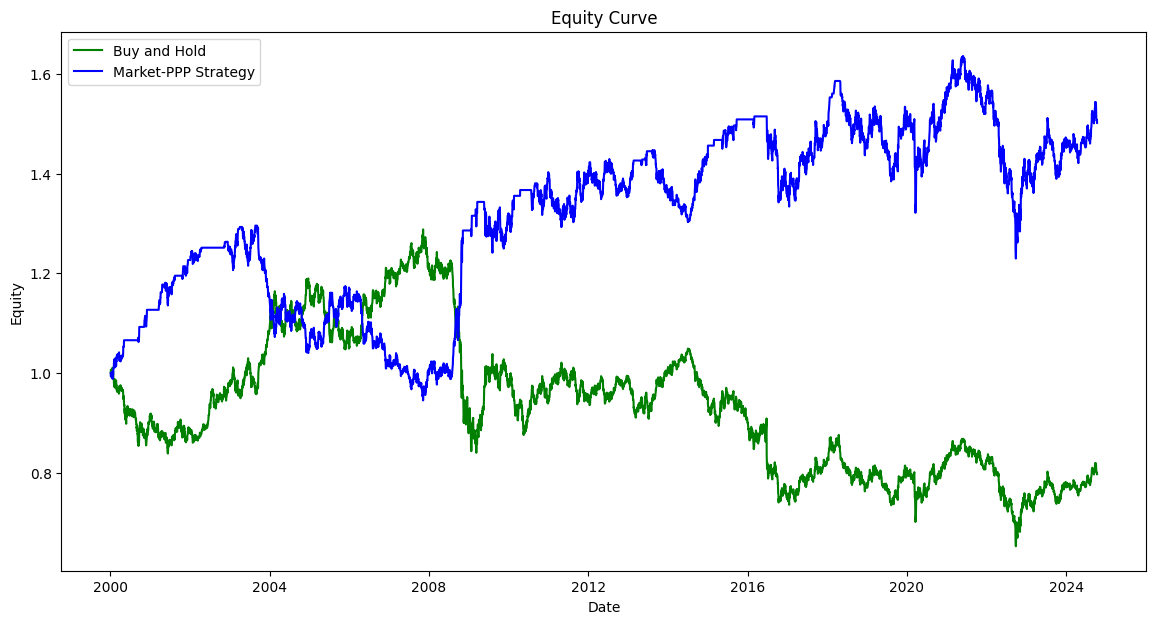

In [ ]:
def backtest_strategy(df, threshold):
  df['signal'] = 0
  ## sell if market value is greater than ppp
  df.loc[df['PPP-GBPUSD-Diff'] > threshold, 'signal'] = -1
  ## buy if market value is less than ppp
  df.loc[df['PPP-GBPUSD-Diff'] < -threshold, 'signal'] = 1

  # Calculate daily returns from GBPUSD price changes
  df['gbpusd_return'] = df['GBPUSD'].pct_change()

# Shift signal by one day to avoid look-ahead bias
  df['strategy_return'] = df['signal'].shift(1) * df['gbpusd_return']

# Calculate the equity curve (cumulative returns) for the strategy
  df['equity_curve'] = (1 + df['strategy_return']).cumprod()
  df['buy_and_hold_return'] = (1 + df['gbpusd_return']).cumprod()

# Plot the equity curve
  plt.figure(figsize=(14, 7))
  sns.lineplot(data = df, x= 'Date', y= 'buy_and_hold_return', color = 'green', label = 'Buy and Hold')
  sns.lineplot(data=df, x='Date', y='equity_curve', color = 'blue', label = 'Market-PPP Strategy')
  plt.title('Equity Curve')
  plt.xlabel('Date')
  plt.ylabel('Equity')
  plt.show()




backtest_strategy(merged_df, 0.05)

Based on the equity chart, we see that this basic signal would've yielded approximately a 50% return across 24 years or so. While at least it's positive, it's not particularly great compared to investing in an index fund over the same period, like the S&P500. It does perform signifanctly better than a buy and hold strategy, however.

## Step 3: Identify Weaknesses
Comment on some weaknesses of what you think could be improved and what is missing. Tie this back to your response to Step 1.

We've outlined some of the limitations to our strategy below:

* Frequency Mismatch: The PPP data is annual, while the trading
signals and GBPUSD returns are daily. This mismatch means that the PPP-based signal changes only once per year, making it insensitive to daily or even monthly market fluctuations. It could miss significant price movements or changes in economic conditions that arise within the year.
Imprecise Timing: Since PPP data is released annually and often with a lag, there’s a timing gap between when the data reflects conditions and when it’s available for use in the strategy. Without careful adjustments or approximations, this lag can weaken the predictive power of the signal, resulting in trades based on outdated information.
Simplicity of the Trading Rule:

* Single Factor Dependence: Relying solely on PPP as a trading signal can be limiting. PPP alone may not capture all relevant drivers of currency value, like interest rates, inflation, or geopolitical events. A more robust strategy would incorporate multiple factors to better gauge exchange rate dynamics.
No Risk Management: The strategy currently lacks risk-control mechanisms. Without tools like stop-loss orders, volatility targeting, or dynamic position sizing, it risks high exposure during adverse market conditions. Including these features could protect against large drawdowns and improve the overall risk-adjusted return.
Backtest and Assumptions:

* Assumption of Constant Tradability: The strategy assumes that the GBPUSD pair is always tradable and that trades can be executed without significant market impact or transaction costs. In reality, market liquidity can fluctuate, and costs can erode profitability, especially in a high-frequency setup.
* No Cost Analysis: The strategy doesn’t account for transaction costs, bid-ask spreads, or slippage. Over many trades, these factors could significantly impact net returns, especially in lower volatility periods where returns might be marginal.
Improvement Opportunities:

* Refining the Signal: Instead of using PPP as a simple binary or threshold signal, consider combining it with other economic indicators or using a trend-following filter to adjust the signal based on recent price movements.
Risk Control Mechanisms: Add position sizing rules, volatility-adjusted entry/exit criteria, or stop-loss conditions to better manage downside risk.
Multi-Timeframe Analysis: Layering additional, shorter-term indicators (such as moving averages or momentum signals) on top of the annual PPP signal could allow the strategy to respond more quickly to market shifts while retaining its fundamental value basis.

## Step 4: Advanced Trading Rule
Think through some common risk mechanisms now. To name a few, there are things like **vol-targeting**, **codified leverage**, etc. Within this univariate series, can you implement a more sophisticated trading rule? Compare one version to your base case and comment on efficacy vs. simplicity (think back to your performance metrics from Dr. Jackson).
 base case and comment of efficacy vs. simplicity (think back to your performance metrics from Dr. Jackson).

## Risk Mechanisms and Enhanced Trading Rule

### Common Risk Mechanisms
- **Volatility Targeting**: Adjusts position size based on market volatility—reduce exposure in high volatility; increase in low.
- **Codified Leverage**: Scales exposure according to historical risk-adjusted returns, using leverage when favorable.
- **Stop-Loss/Take-Profit Levels**: Sets fixed exit points based on historical price behavior.
- **Moving Averages**: Smooths signals by combining short- and long-term trends, reducing trades based on temporary fluctuations.

### Enhanced Trading Rule with Volatility Targeting
1. **Calculate Volatility**: Rolling 20-day volatility of GBPUSD returns.
2. **Adjust Position Size**: Target a 10% annualized volatility. Scale positions proportionally (down in high volatility, up in low).
3. **Apply Strategy**: Combine PPP signal with the adjusted position size for daily returns.

### Comparison: Base Case vs. Enhanced Rule
- **Base Case**: Simpler, trades solely on PPP without risk adaptation.
- **Volatility Targeted Strategy**: Adds a volatility adjustment to the signal, yielding better **risk-adjusted returns** by limiting high-risk periods.

### Efficacy vs. Simplicity
- **Efficacy**: The enhanced rule stabilizes returns, often improving **Sharpe Ratio** and reducing drawdowns.
- **Simplicity**: Base case is more interpretable but lacks adaptability. The volatility adjustment improves robustness, making it valuable despite added complexity.

In summary, volatility targeting creates a more resilient strategy that adapts to market conditions, aligning better with professional risk practices for smoother returns.


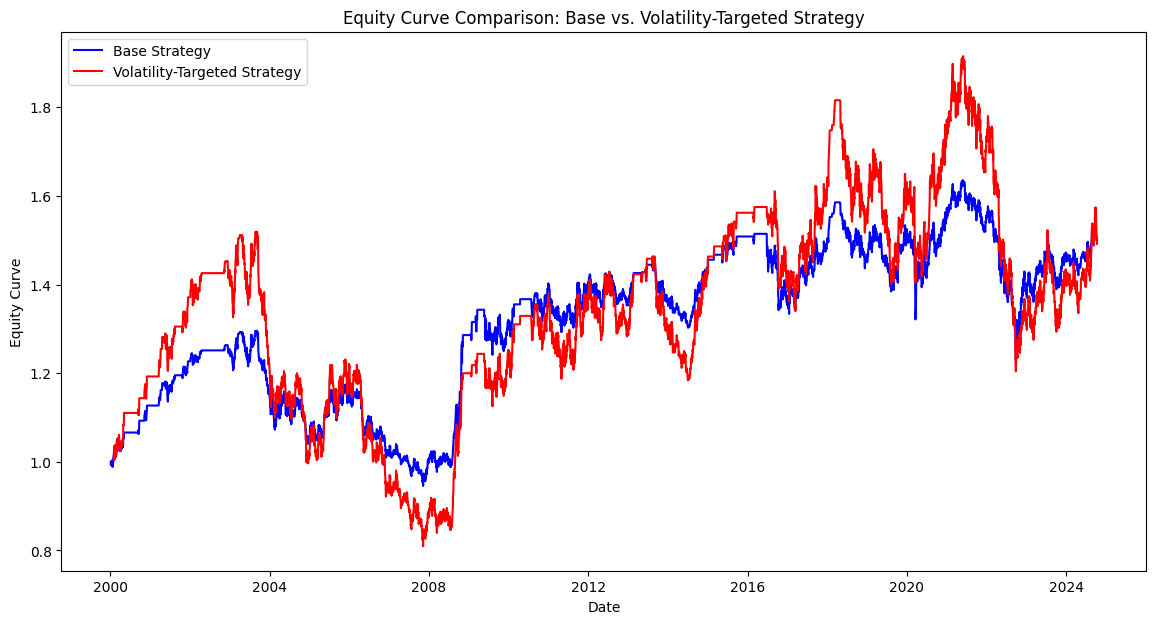

In [ ]:
def advanced_backtest_strategy(df, threshold, target_vol, window):


  df['gbpusd_return'] = df['GBPUSD'].pct_change()

  # Step 2: Calculate rolling volatility
  window = 20  # 20-day rolling window
  df['volatility'] = df['gbpusd_return'].rolling(window).std() * np.sqrt(252)  # Annualized volatility

  # Step 3: Define target annual volatility (e.g., 10%) and calculate position adjustment
  df['adjusted_signal'] = ((target_vol / df['volatility']).clip(upper=2) * df['signal'].shift(1))

  # Step 4: Calculate returns for both the base strategy and the volatility-targeted strategy
  df['targeted_strategy_return'] = df['adjusted_signal'] * df['gbpusd_return']  # Volatility-targeted return


  df['targeted_equity_curve'] = (1 + df['targeted_strategy_return']).cumprod()

  # Plot the results
  plt.figure(figsize=(14, 7))
  plt.plot(df['Date'], df['equity_curve'], label='Base Strategy', color='blue')
  plt.plot(df['Date'], df['targeted_equity_curve'], label='Volatility-Targeted Strategy', color='red')
  plt.xlabel('Date')
  plt.ylabel('Equity Curve')
  plt.title('Equity Curve Comparison: Base vs. Volatility-Targeted Strategy')
  plt.legend()
  plt.show()

advanced_backtest_strategy(merged_df, 0.05, 0.15, 20)

For reference, we have plotted this new strategy alongside our base strategy given a maximum yearly volatility of 0.15. We can see that it essentially mirrors the base strategy but it takes some informed risks. Overall, it performs nearly identically to the first strategy, so there could be room for some improvement.

In [ ]:
gbpusd_spot = merged_df[['Date','GBPUSD']]
gbpusd_spot.head()

,Date,GBPUSD
0,2000-01-03,1.6362
1,2000-01-04,1.6360
2,2000-01-05,1.6426
3,2000-01-06,1.6474
4,2000-01-07,1.6393


# Part 3
A key item you might have identified is that it is hard to make a lot of money systematically trading only one security, based on one “factor”, with one data source. Let’s look at a systematic trader’s best friend:

## Step 1:
Leveraging the data from part 1 and the rest of the developed currencies from the “G10” tab in the provided BBG data, write a neat function and plot of equity curves to iterate your base signal and advanced signal on the whole universe (two plots for all 9 in both a base and advanced). Take note of what is base currency vs. what is not!! (XXXUSD vs. USDXXX).

- For the Euro I am just using Germany's PPP
- Note: I dont think we need to convert EURUSD -> USDEUR because its all relative

In [ ]:
bbg_data_g10 = pd.read_excel('MP2.Data.From.BBG.xlsx', 'G10')

## extract GB and USD PPP data
ppp_g10 = ppp_df[['United States', 'United Kingdom', 'Germany',
                  'Australia', 'New Zealand', 'Sweden', 'Norway',
                  'Japan', 'Canada', 'Switzerland']]

# Adding GBPUSD back into exchange rates
gbpusd_spot = merged_df[['Date','GBPUSD']]
gbpusd_spot.rename(columns={'GBPUSD': 'GBPUSD Curncy'}, inplace=True)
gbpusd_spot['Dates'] = gbpusd_spot['Date']
gbpusd_spot.drop('Date', axis=1, inplace=True)
gbpusd_spot.head()

bbg_data_g10 = bbg_data_g10.merge(gbpusd_spot, on='Dates', how='left')

bbg_data_g10['Year'] = bbg_data_g10['Dates'].dt.year

# Merge bbg_data with ppp_us_gb on 'Year'
# Since ppp_g10 index is 'Year', reset it to use it as a column
ppp_g10 = ppp_g10.reset_index().rename(columns={'index': 'Year'})

# Perform the merge based on the 'Year' column
merged_df = bbg_data_g10.merge(ppp_g10, on='Year', how='left')

date_to_ppp_year.rename(columns={'Date': 'Dates'}, inplace=True)

merged_df = merged_df.merge(date_to_ppp_year, on='Dates', how='left')

In [ ]:
### Finding the relative PPP (between 2 countries) to relate to the FX exchange rates

# the base rates are different, so we will need to calc PPP ratio appropriatly

# Foreign Base rates:
merged_df['PPP-EURUSD'] = merged_df['United States'] / merged_df['Germany']
merged_df['PPP-AUDUSD'] = merged_df['United States'] / merged_df['Australia']
merged_df['PPP-NZDUSD'] = merged_df['United States'] / merged_df['New Zealand']
merged_df['PPP-GBPUSD'] = merged_df['United States'] / merged_df['United Kingdom']

# US Base rates:
merged_df['PPP-USDSEK'] = merged_df['Sweden'] / merged_df['United States']
merged_df['PPP-USDNOK'] = merged_df['Norway'] / merged_df['United States']
merged_df['PPP-USDJPY'] = merged_df['Japan'] / merged_df['United States']
merged_df['PPP-USDCAD'] = merged_df['Canada'] / merged_df['United States']
merged_df['PPP-USDCHF'] = merged_df['Switzerland'] / merged_df['United States']


### find percent diff between market and ppp

# foreign base rates
merged_df['PPP-EURUSD-Diff'] = (merged_df['EURUSD Curncy'] - merged_df['PPP-EURUSD']) / merged_df['PPP-EURUSD']
merged_df['PPP-AUDUSD-Diff'] = (merged_df['AUDUSD Curncy'] - merged_df['PPP-AUDUSD']) / merged_df['PPP-AUDUSD']
merged_df['PPP-NZDUSD-Diff'] = (merged_df['NZDUSD Curncy'] - merged_df['PPP-NZDUSD']) / merged_df['PPP-NZDUSD']
merged_df['PPP-GBPUSD-Diff'] = (merged_df['GBPUSD Curncy'] - merged_df['PPP-GBPUSD']) / merged_df['PPP-GBPUSD']

# US base rates
merged_df['PPP-USDSEK-Diff'] = (merged_df['USDSEK Curncy'] - merged_df['PPP-USDSEK']) / merged_df['PPP-USDSEK']
merged_df['PPP-USDNOK-Diff'] = (merged_df['USDNOK Curncy'] - merged_df['PPP-USDNOK']) / merged_df['PPP-USDNOK']
merged_df['PPP-USDJPY-Diff'] = (merged_df['USDJPY Curncy'] - merged_df['PPP-USDJPY']) / merged_df['PPP-USDJPY']
merged_df['PPP-USDCAD-Diff'] = (merged_df['USDCAD Curncy'] - merged_df['PPP-USDCAD']) / merged_df['PPP-USDCAD']
merged_df['PPP-USDCHF-Diff'] = (merged_df['USDCHF Curncy'] - merged_df['PPP-USDCHF']) / merged_df['PPP-USDCHF']

In [ ]:
fx_names = ['EURUSD', 'AUDUSD', 'NZDUSD',
       'USDSEK', 'USDNOK', 'USDJPY', 'USDCAD',
       'USDCHF', 'GBPUSD']

In [ ]:
def g10_backtest(df_orig, threshold, fx_names, plot=True, figsize=(16,8)):

  if plot:
    fig, axs = plt.subplots(figsize=figsize)

  df = df_orig.copy() # so df original isn't affected
  for fx in fx_names:
    df['signal'] = 0

    # Buy sell strat:
    df.loc[df[f'PPP-{fx}-Diff'] > threshold, 'signal'] = -1
    df.loc[df[f'PPP-{fx}-Diff'] < -threshold, 'signal'] = 1

    # Calculate daily returns from GBPUSD price changes
    df['return'] = df[f"{fx} Curncy"].pct_change()

    # Shift signal by one day to avoid look-ahead bias
    df[f'strategy_return'] = df['signal'].shift(1) * df['return']

    # Calculate the equity curve (cumulative returns) for the strategy
    df['equity_curve'] = (1 + df['strategy_return']).cumprod()
    if plot:
      sns.lineplot(data=df, x='Dates', y='equity_curve', label=fx)

  if plot:
    plt.title(f'Equity Curve of Base Strategy of G10')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.legend()
    plt.show()
  return None

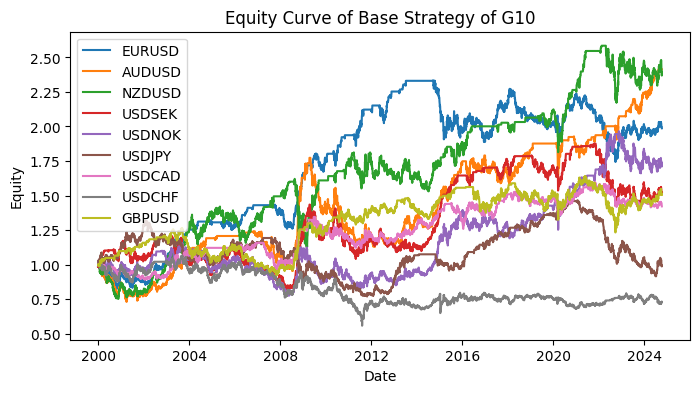

In [ ]:
g10_backtest(merged_df, 0.05, fx_names, figsize=(8,4))

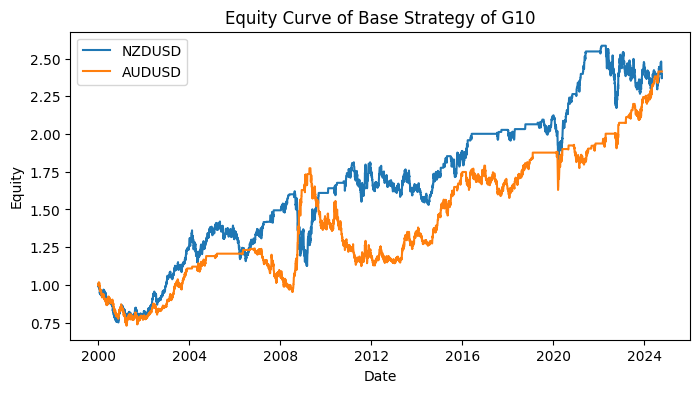

In [ ]:
g10_backtest(merged_df, 0.05, ['NZDUSD', 'AUDUSD'], figsize=(8,4)) # best performers

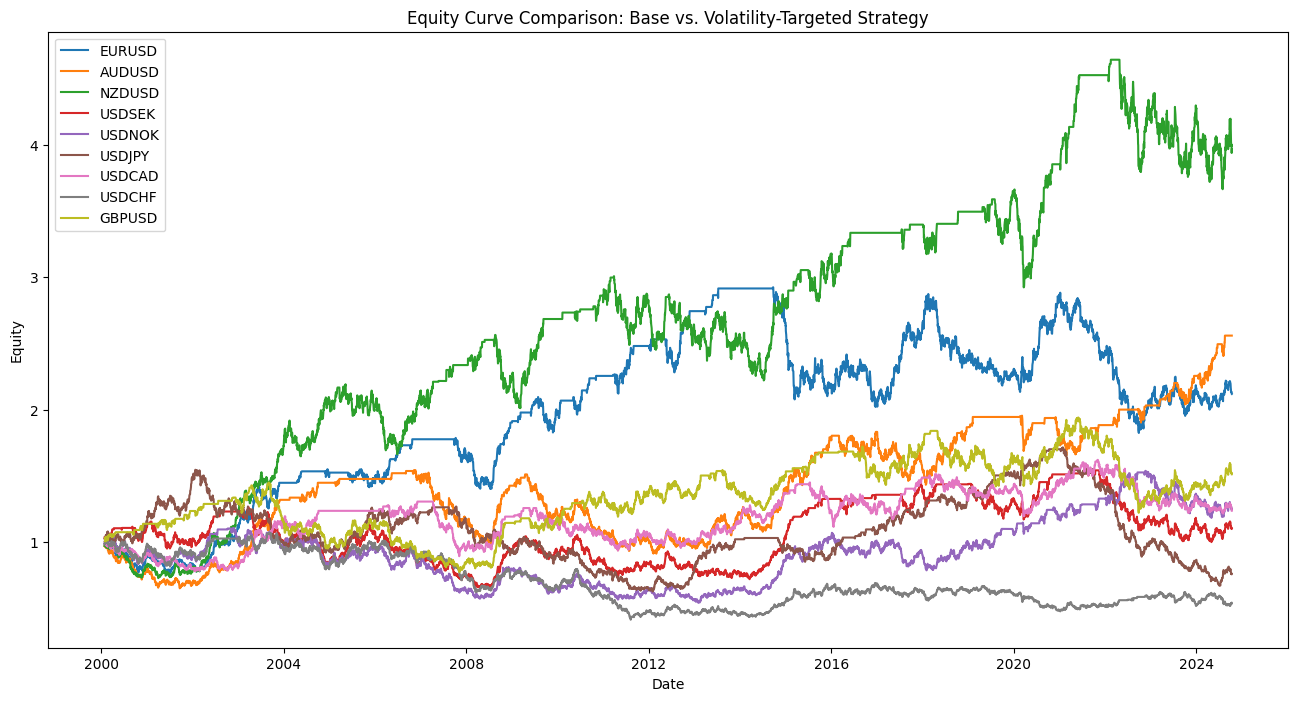

In [ ]:
def g10_advanced_backtest_strategy(df_orig, threshold, target_vol, fx_names, plot=True, window=20, figsize = (16,8)):

  if plot:
    fig, axs = plt.subplots(figsize=figsize)

  df = df_orig.copy() # so df original isn't affected
  for fx in fx_names:


    df['signal'] = 0

    # Buy sell strat. Note this is same as simple but we will acct for vol
    df.loc[df[f'PPP-{fx}-Diff'] > threshold, 'signal'] = -1
    df.loc[df[f'PPP-{fx}-Diff'] < -threshold, 'signal'] = 1

    df['return'] = df[f'{fx} Curncy'].pct_change()

    # Step 2: Calculate rolling volatility
    df['volatility'] = df['return'].rolling(window).std() * np.sqrt(252)  # Annualized volatility

    # Step 3: Define target annual volatility (e.g., 10%) and calculate position adjustment
    df['adjusted_signal'] = ((target_vol / df['volatility']).clip(upper=2) * df['signal'].shift(1))

    # Step 4: Calculate returns for both the base strategy and the volatility-targeted strategy
    df['targeted_strategy_return'] = df['adjusted_signal'] * df['return']  # Volatility-targeted return

    df['targeted_equity_curve'] = (1 + df['targeted_strategy_return']).cumprod()

    if plot:
      sns.lineplot(data=df, x='Dates', y='targeted_equity_curve', label=fx)


  if plot:
    plt.title('Equity Curve Comparison: Base vs. Volatility-Targeted Strategy')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.legend()
    plt.show()

g10_advanced_backtest_strategy(merged_df, 0.05, 0.15, fx_names, window=20, figsize=(16,8))

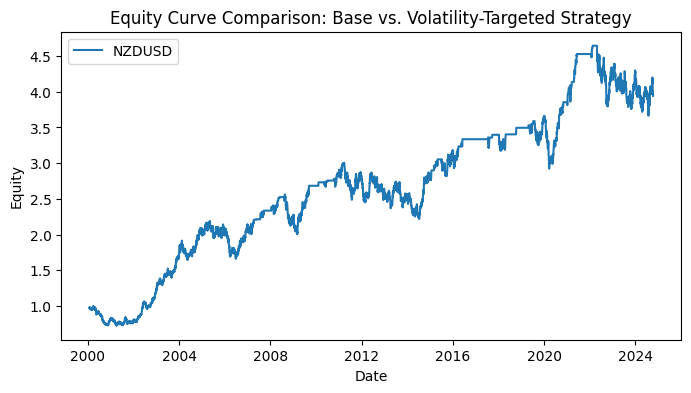

In [ ]:
g10_advanced_backtest_strategy(merged_df, 0.05, 0.15, ['NZDUSD'], window=20, figsize=(8,4)) # best performer

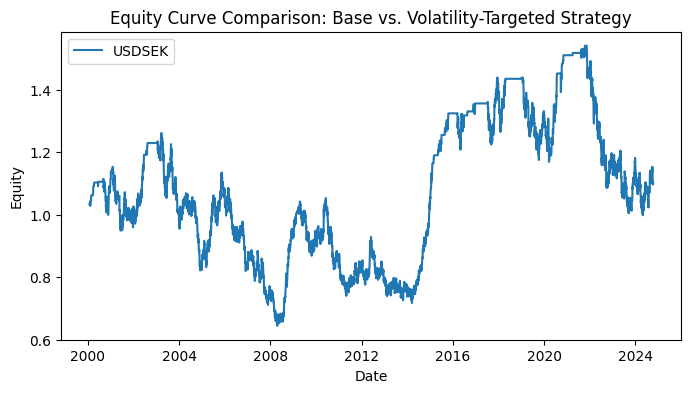

Base strat:


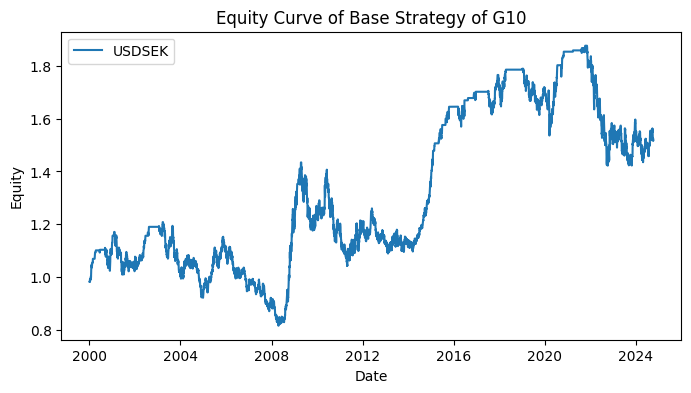

In [ ]:
g10_advanced_backtest_strategy(merged_df, 0.05, 0.15, ['USDSEK'], window=20, figsize=(8,4))
print("Base strat:")
g10_backtest(merged_df, 0.05, ['USDSEK'], figsize=(8,4)) # best performers

**Comment on the performance and anything interesting that stands out in efficacy of signal, things that don’t work, and things that do. Curious on any thoughts around the Swiss Franc circa 2015.**


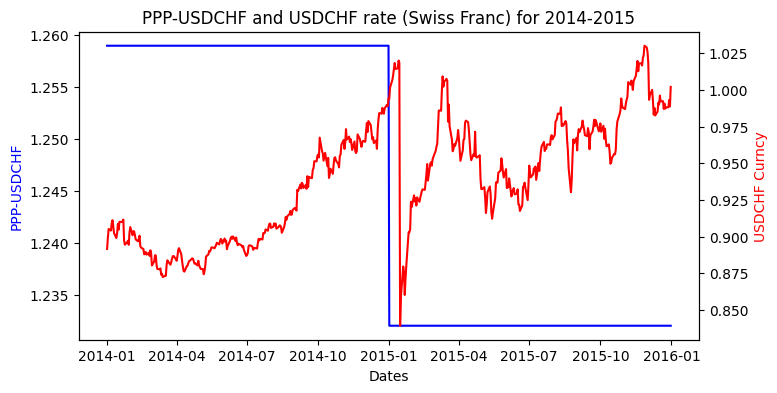

In [ ]:
import datetime

start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2015, 12, 31)
filtered_df = merged_df[(merged_df['Dates'] >= start_date) & (merged_df['Dates'] <= end_date)]

fig, ax1 = plt.subplots(figsize=(8, 4))

sns.lineplot(data=filtered_df, x='Dates', y='PPP-USDCHF', ax=ax1, color='blue')
ax1.set_ylabel("PPP-USDCHF", color='blue')

ax2 = ax1.twinx()
sns.lineplot(data=filtered_df, x='Dates', y='USDCHF Curncy', ax=ax2, color='red')
ax2.set_ylabel("USDCHF Curncy", color='red')

plt.title('PPP-USDCHF and USDCHF rate (Swiss Franc) for 2014-2015')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()

## Comments

**PUT THOUGHTS HERE**
- comparisons between diff currencies for the normal backtest
- same for advanced
- thoughts ab swiss franc

*** I started doing this but add more later

Our simple buy/sell strategy of buying a currency when it is undervalued and selling when it is overvalued seems to work fairly well for certain currencies such as NZD, EUR, and AUD.

For other currencies, specifically CHF (which was particularly bad for the entire duration of the backtest), our model didn't do so well.

Concerning the Swiss **** ADD here

### Description
**For basic strategy:**\
The base strategy demonstrate a consistent but moderate performance with some currency pairs continue to grow. Some pairs, such as NZDUSD and AUDUSD, exhibit strong upward trends, suggesting the base strategy's effectiveness with these pairs. However, some pairs, such as USDJPY and USDCHF have flatter trajectories, indicating limited profitability or even slight losses.

**For volatility-targeted strategy:**\
The volatility-targeted strategy shows marked improvements in performance, particularly for pairs like NZDUSD , with the equity curve scaling higher than the base strategy over the same period.This strategy seems to perform well in volatile market environments by adjusting position sizes based on recent volatility. This approach appears particularly effective for pairs with higher or variable volatility, allowing it to capitalize on market swings without excessive risk. However, for certain pairs, such as GBPUSD and USDCHF, the volatility targeting did not significantly enhance performance, which may imply that the base signal for these pairs does not strongly benefit from volatility adjustments.

The strategy overall seems effective for pairs with higher volatility and trending behaviors (e.g., USDNOK, EURUSD), suggesting that the signal performs well in identifying directional moves but may struggle with ranging markets.\
For currencies with less variability or lower trading volume, the signal's efficacy appears limited.

**Thoughts about the Swiss Franc circa 2015**\
In 2015, the Swiss Franc (CHF) experienced a significant and unprecedented event known as the Swiss Franc shock. on January 15, 2015, the Swiss National Bank (SNB) unexpectedly decided to remove the 1.20 EUR/CHF floor. This unexpected move caused the Swiss Franc to appreciate sharply against other major currencies, particularly the Euro and the U.S. Dollar.This abnormal appreciation generated too much volitility for model to capture or beyond the model's scope cause the inefficiency in models.

## Step 2
**Where as we have generally been working in an absolute (linear reg) methodology, let us move towards a relative value (logistic reg). Taking both your base and advanced signal, create a function tweak it to output some form of relative ranking that can be assessed to create a long-short.**

So far we have used an absolute "buy or sell" method. We can transition to a method that assesses the strength of our buy or sell signal. For example, a greater differential in the PPP and spot price will generate a stronger signal. For example a differential of 50% will generate a greater signal than a differential of 6%. This may seem obvious, but previously our model made the decisions based on absolute thresholds; so, a signal of 6% and 50% both led the model to buy.

Below we use a logistic regression model to rank the buy and sell signals. For the model output, a value of 1 means that the given buy value is the strongest buy value, or ts ranked the highest out of all other buy signals. This is true for selling as well where an output value of 0 means that that input differential is the most positive, meaning the currency is the most overvalued its been and we should sell.

Taking this model we can apply it to our previous buy/sell logic, but now instead of a binary buy-sell dicision based on if the PPP-spot differential is greater than a threshold in either direction, we can make decisions on the relative value of a PPP-spot differential based on all previous data.

Now, for the function below, the decision threshold to buy or sell is a relative percentage. The default value is 0.2. this means that we will buy if the buy signal is in the top 20% of all buy signals. We sell if the buy signal is in the bottom 20% of all buy signals. Note "buy signal" is somewhat misleading as it is just a mapping of all the PPP-spot differentials to a range of [0, 1] where a 1 is the "strongest buy signal".

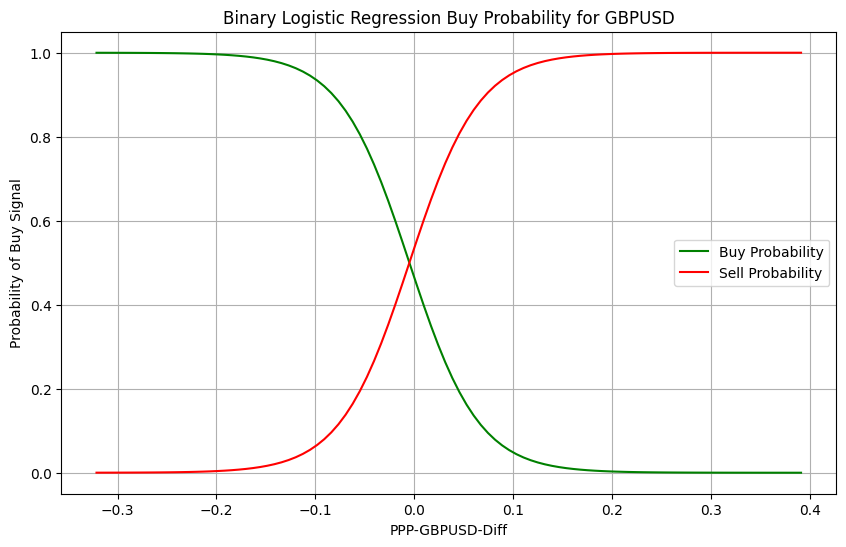

In [ ]:
# Example of our log regress model
from sklearn.linear_model import LogisticRegression
fx = 'GBPUSD'

df_copy = merged_df.copy()

df_copy[f'{fx}_signal'] = 0
df_copy[f'{fx}_return'] = df_copy[f"{fx} Curncy"].pct_change()
df_copy.loc[df_copy[f'PPP-{fx}-Diff'] >= 0, f'{fx}_signal'] = 0  # Sell signal
df_copy.loc[df_copy[f'PPP-{fx}-Diff'] < 0, f'{fx}_signal'] = 1  # Buy signal


X = df_copy[[f'PPP-{fx}-Diff']].fillna(0)
y = df_copy[f'{fx}_signal']

model = LogisticRegression()
model.fit(X, y)

df_copy['Buy Probability'] = model.predict_proba(X)[:, 1]

df_copy['Sell Probability'] = model.predict_proba(1-X)[:, 1]


# plotting
ppp_diff_range = np.linspace(df_copy[f'PPP-{fx}-Diff'].min(), df_copy[f'PPP-{fx}-Diff'].max(), 100).reshape(-1, 1)

probabilities = model.predict_proba(ppp_diff_range)[:, 1] # prob of buy

plt.figure(figsize=(10, 6))
plt.plot(ppp_diff_range, probabilities, label='Buy Probability', color='green')
plt.plot(ppp_diff_range, 1-probabilities, label='Sell Probability', color='Red')

plt.title(f'Binary Logistic Regression Buy Probability for {fx}')
plt.xlabel(f'PPP-{fx}-Diff')
plt.ylabel('Probability of Buy Signal')
plt.legend()
plt.grid(True)
plt.show()

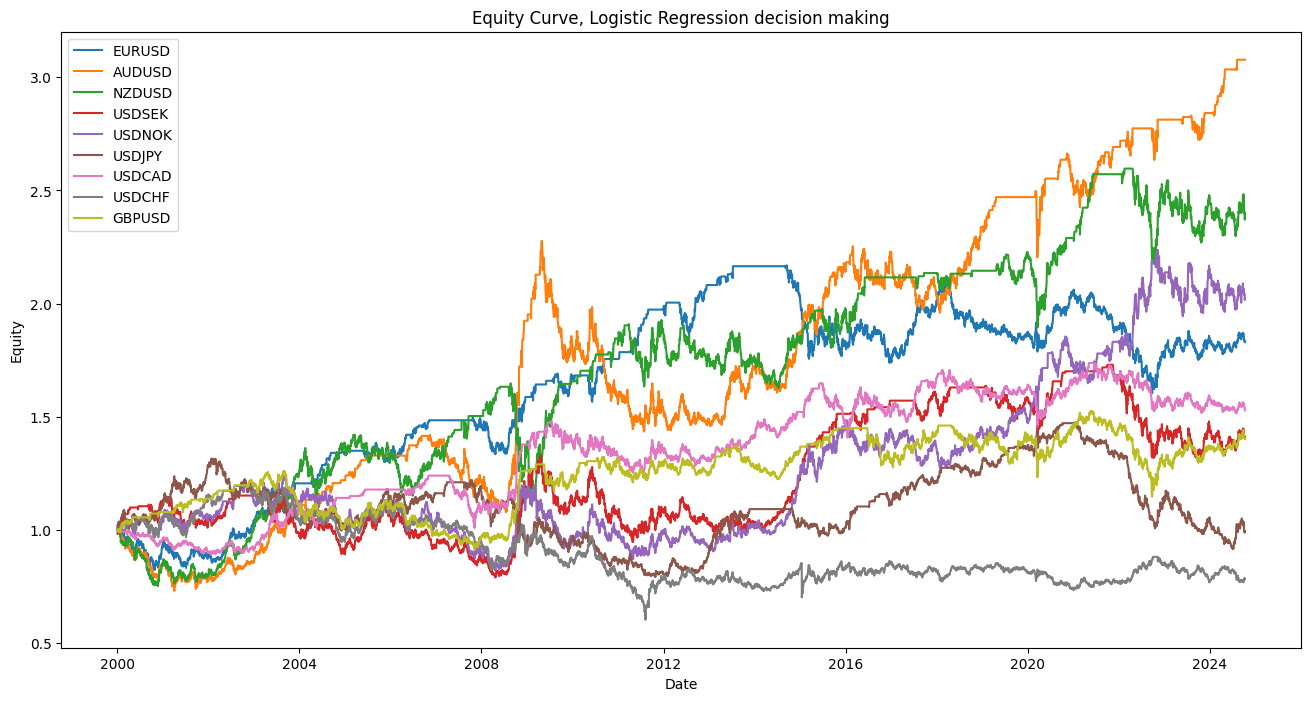

In [ ]:

def g10_rel_backtest(df_orig, fx_names, threshold_pctile=y, figsize=(16,8)):
    '''
    This function creates a logistic regression model based on the PPP-spot price
    difference for a given currency. It then creates buy or sell decision based
    on the strength of the buy signal from the log regression model. For example
    a buy signal of (0.5+threshold, 1) from our model will lead to a buy decision.


    We buy if the buy signal is in the top x% of all buy signals.
    We sell if the buy signal is in the bottom x% of all buy signals.

    where x = threshold_pct

    '''

    fig, axs = plt.subplots(figsize=figsize)

    df = df_orig.copy()

    for fx in fx_names:

      # here we tell the model that a negative (undervalued) number means buy and
      # a positive number means sell.

      df[f'value'] = 0
      df[f'return'] = df[f"{fx} Curncy"].pct_change()
      df.loc[df[f'PPP-{fx}-Diff'] >= 0, f'value'] = 0  # overvalued signal
      df.loc[df[f'PPP-{fx}-Diff'] < 0, f'value'] = 1  # undervalued signal

      X = df[[f'PPP-{fx}-Diff']].fillna(0)
      y = df[f'value']

      model = LogisticRegression()
      model.fit(X, y)

      df['Buy Probability'] = model.predict_proba(X)[:, 1]


      # This is where we decide to buy sell or hold

      # hold by default
      df['signal'] = 0

      df['signal'] = np.where(
          df['Buy Probability'] > 1-threshold_pctile, 1,  # Set to 1 if Buy Probability > 75%
          np.where(df['Buy Probability'] < threshold_pctile, -1, 0)  # Set to -1 if Buy Probability < 25%, else 0
      )


      df['return'] = df[f"{fx} Curncy"].pct_change()
      df['strategy_return'] = df['signal'].shift(1) * df['return']
      df['equity_curve'] = (1 + df['strategy_return']).cumprod()

      sns.lineplot(data=df, x='Dates', y='equity_curve', label=fx)

    plt.title('Equity Curve, Logistic Regression decision making')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.legend
    plt.show()

g10_rel_backtest(merged_df, fx_names, threshold_pctile=0.20, figsize=(16,8))

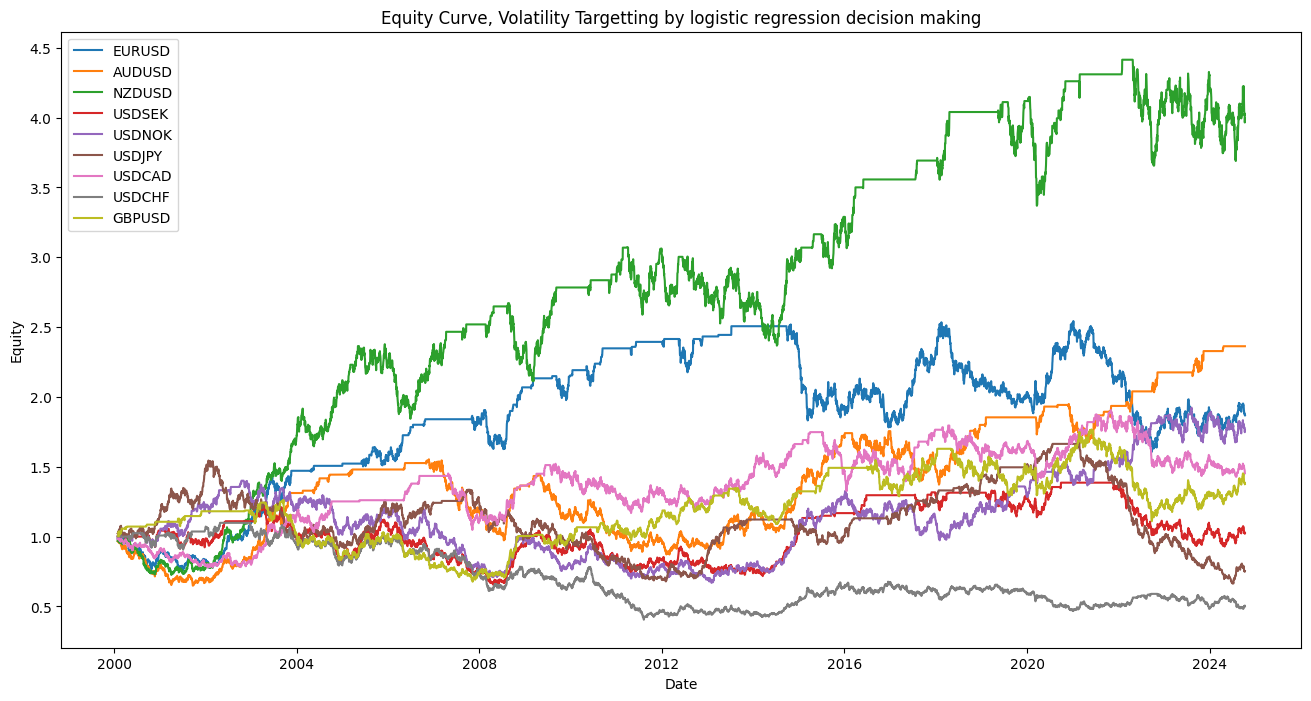

In [ ]:
def g10_rel_advanced_backtest(df_orig, fx_names, target_vol=0.15, window=20, threshold_pctile=0.20, figsize=(16,8)):
    '''
    This function creates a logistic regression model based on the PPP-spot price
    difference for a given currency. It then creates buy or sell decision based
    on the strength of the buy signal from the log regression model. For example
    a buy signal of (0.5+threshold, 1) from our model will lead to a buy decision.


    We buy if the buy signal is in the top x% of all buy signals.
    We sell if the buy signal is in the bottom x% of all buy signals.

    where x = threshold_pct

    '''

    fig, axs = plt.subplots(figsize=figsize)

    df = df_orig.copy()

    for fx in fx_names:

      # here we tell the model that a negative (undervalued) number means buy and
      # a positive number means sell.

      df[f'value'] = 0
      df[f'return'] = df[f"{fx} Curncy"].pct_change()
      df.loc[df[f'PPP-{fx}-Diff'] >= 0, f'value'] = 0  # overvalued signal
      df.loc[df[f'PPP-{fx}-Diff'] < 0, f'value'] = 1  # undervalued signal

      X = df[[f'PPP-{fx}-Diff']].fillna(0)
      y = df[f'value']

      model = LogisticRegression()
      model.fit(X, y)

      df['Buy Probability'] = model.predict_proba(X)[:, 1]


      # This is where we decide to buy sell or hold

      # hold by default
      df['signal'] = 0

      df['signal'] = np.where(
          df['Buy Probability'] > 1-threshold_pctile, 1,  # Set to 1 if Buy Probability > 75%
          np.where(df['Buy Probability'] < threshold_pctile, -1, 0)  # Set to -1 if Buy Probability < 25%, else 0
      )


      # Relative volatility and trade size calc
      df['return'] = df[f"{fx} Curncy"].pct_change()
      df['volatility'] = df['return'].rolling(window).std() * np.sqrt(252)
      df['adjusted_signal'] = ((target_vol / df['volatility']).clip(upper=2) * df['signal'].shift(1))

      df['strategy_return'] = df['adjusted_signal'] * df['return']  # Volatility-targeted return
      df['equity_curve'] = (1 + df['strategy_return']).cumprod()

      sns.lineplot(data=df, x='Dates', y='equity_curve', label=fx)

    plt.title('Equity Curve, Volatility Targetting by logistic regression decision making')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.legend
    plt.show()

g10_rel_advanced_backtest(merged_df, fx_names, target_vol=0.15, window=20, threshold_pctile=0.15, figsize=(16,8))

### Advanced Strategy 2
Trying another strategy where our position size is based in our confidence of the trade i.e. proportional to the disparity in valuation.

This strategy bases the signal strength on the probability of a given PPP-exchange rate differential being a buy signal from our linear regression model. We also adjust our buy size by the volatility (vol targetting).

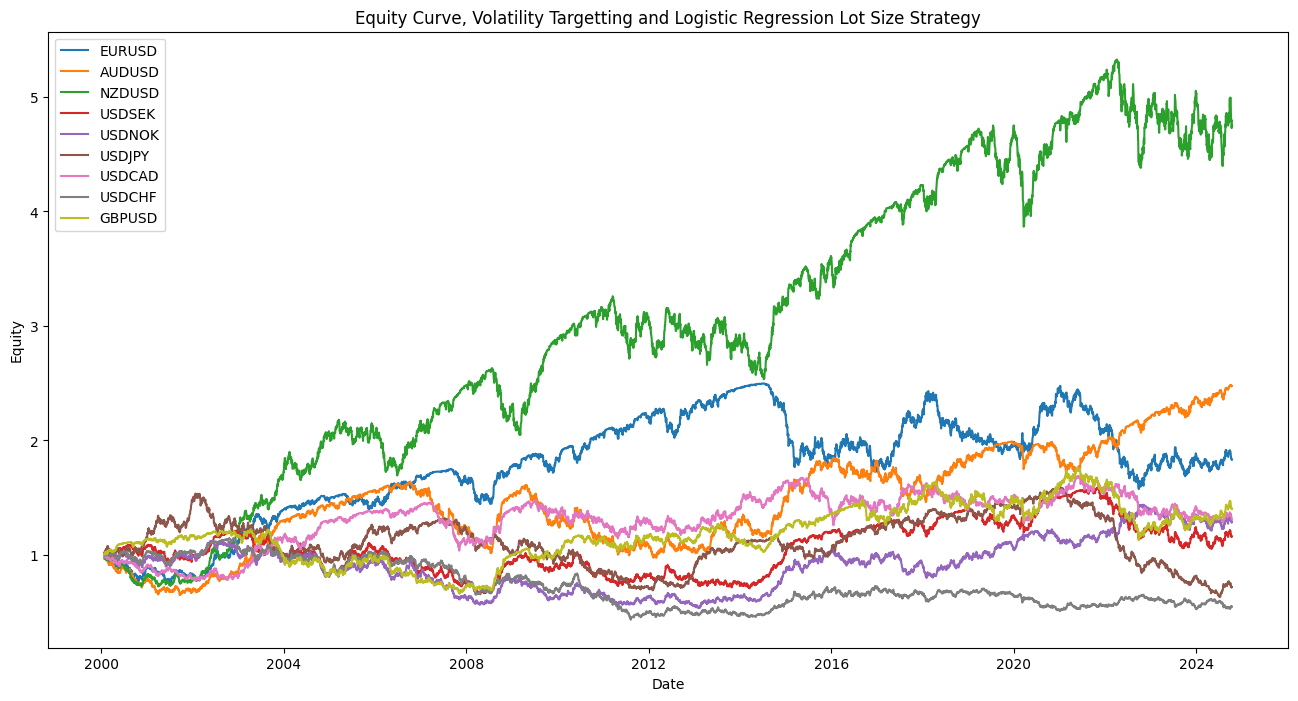

In [ ]:
def g10_rel_advanced_backtest_2(df_orig, fx_names, target_vol=0.15, window=20, figsize=(16,8)):
    '''
    This function creates a logistic regression model based on the PPP-spot price
    difference for a given currency. It then creates buy or sell decision based
    on the strength of the buy signal from the log regression model. For example
    a buy signal of (0.5+threshold, 1) from our model will lead to a buy decision.


    We buy if the buy signal is in the top x% of all buy signals.
    We sell if the buy signal is in the bottom x% of all buy signals.

    where x = threshold_pct

    '''

    fig, axs = plt.subplots(figsize=figsize)

    df = df_orig.copy()

    for fx in fx_names:

      # here we tell the model that a negative (undervalued) number means buy and
      # a positive number means sell.

      df[f'value'] = 0
      df[f'return'] = df[f"{fx} Curncy"].pct_change()
      df.loc[df[f'PPP-{fx}-Diff'] >= 0, f'value'] = 0  # overvalued signal
      df.loc[df[f'PPP-{fx}-Diff'] < 0, f'value'] = 1  # undervalued signal

      X = df[[f'PPP-{fx}-Diff']].fillna(0)
      y = df[f'value']

      model = LogisticRegression()
      model.fit(X, y)

      df['Buy Probability'] = model.predict_proba(X)[:, 1]

      # This is where we decide to buy sell or hold

      # hold by default
      df['signal'] = (df['Buy Probability'] - 0.5) * 2  # transforms from [0, 1] to [-1, 1]

      # Relative volatility and trade size calc
      df['return'] = df[f"{fx} Curncy"].pct_change()
      df['volatility'] = df['return'].rolling(window).std() * np.sqrt(252)
      df['adjusted_signal'] = ((target_vol / df['volatility']).clip(upper=2) * df['signal'].shift(1))

      df['strategy_return'] = df['adjusted_signal'] * df['return']  # Volatility-targeted return
      df['equity_curve'] = (1 + df['strategy_return']).cumprod()

      sns.lineplot(data=df, x='Dates', y='equity_curve', label=fx)

    plt.title('Equity Curve, Volatility Targetting and Logistic Regression Lot Size Strategy')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.legend
    plt.show()

g10_rel_advanced_backtest_2(merged_df, fx_names, target_vol=0.15, window=20, figsize=(16,8))

## Step 3
**Evaluate your strategy.**

### TO-DO: Add Description

- I added some basic notes, see below
- play around with the 3 hyperparameters below and see differences between the two graphs.

!!!!!!!!!!!!!!!!!!!!!!!!!!!




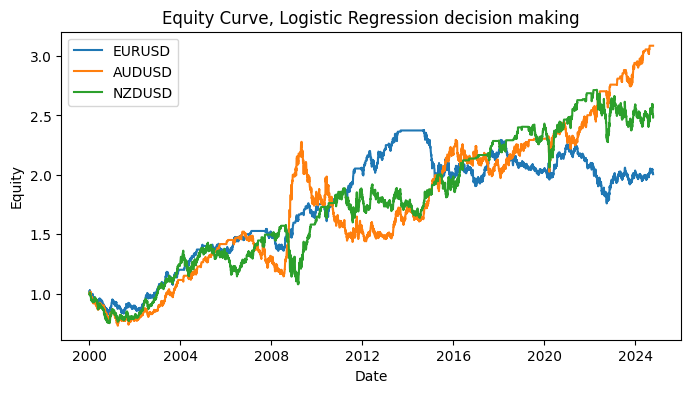

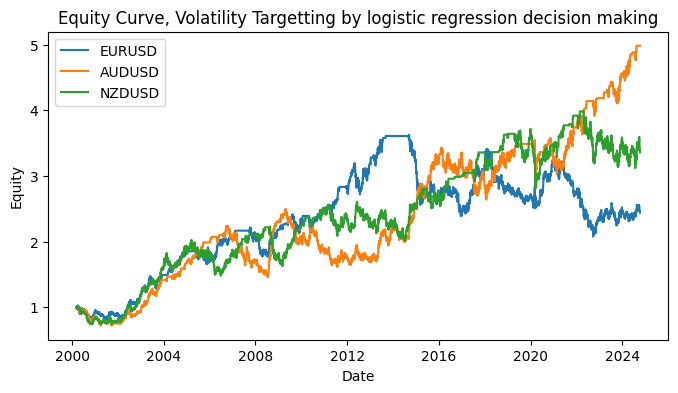

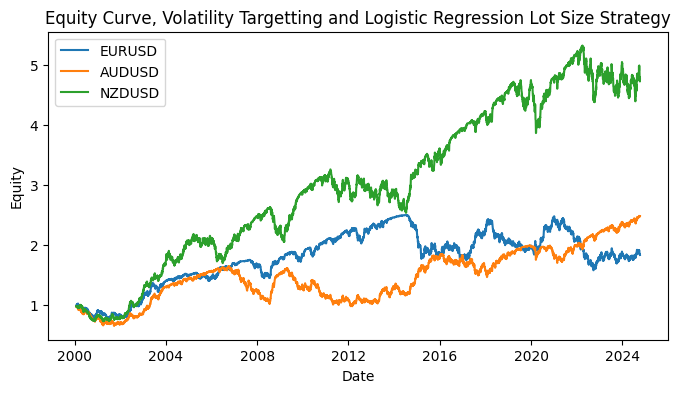

In [ ]:
threshold_pctile=0.25 # how "picky" we are at selecting to buy or sell
target_vol=0.15 # what vol we're looking for
window=50 # how many days back we look

# fx_names = ['EURUSD', 'AUDUSD', 'NZDUSD',
#        'USDSEK', 'USDNOK', 'USDJPY', 'USDCAD',
#        'USDCHF', 'GBPUSD']

fx_names = ['EURUSD', 'AUDUSD', 'NZDUSD']


g10_rel_backtest(merged_df, fx_names, threshold_pctile, figsize=(8,4))
g10_rel_advanced_backtest(merged_df, fx_names, target_vol, window, threshold_pctile, figsize=(8,4))
g10_rel_advanced_backtest_2(merged_df, fx_names, target_vol=0.15, window=20, figsize=(8,4))

**PUT THOUGHTS HERE**
- comparisons between diff currencies for the normal backtest
- same for advanced
- thoughts ab swiss franc

- also compare logistic to linear models (absolute vs relative)

  - g10_rel_backtest() and g10_rel_advanced_backtest() are relative


Eval strat as a whole


### Description
**For basic logistic strategy**:\
This model uses logistic regression based on the PPP-spot price difference for each currency to decide on buy, sell, or hold signals.It likely buys or sells only when the predicted buy probability is in the top or bottom percentiles, as defined by the threshold.\
The model appears to work well with currency pairs that exhibit more trending behavior or volatility. However, it may struggle with pairs that are more range-bound or exhibit lower volatility.

**For Volatility-Targeted Logistic Regression strategy**:\
This model builds on the basic logistic regression approach by adding a volatility targeting mechanism. It adjusts position sizes based on recent volatility, aiming to maintain a target annualized volatility.By adjusting positions relative to volatility, the model increases position size when volatility is low and decreases it when volatility is high. This adjustment seeks to provide a smoother equity curve and potentially better risk-adjusted returns.\
This model demonstrates improved performance and smoother equity curves, especially for currency pairs with higher volatility. It also reduces large drawdowns, which were more common in the basic model, making the equity growth more consistent over time.

**Volatility-Targeted and Logistic Regression Lot Size Strategy**:\
This strategy uses a logistic regression model with a continuous signal rather than binary buy/sell signals. The signal is scaled from -1 to 1 based on the predicted probability of buying or selling. It incorporates volatility targeting by adjusting the position size relative to volatility, with more nuanced control over lot sizes.\
This model shows the strongest performance among the three, with the highest equity values and smoother equity curves. It combines a refined lot size adjustment with volatility targeting, enabling more precise risk control and capital allocation, which leads to higher and more stable returns.

**Comparision between regression(absolute) and logistic(relative) strategies**:\
Linear Regression Models are more sensitive to noise and ideal for stable trending markets where precision is valuable, but they may suffer in noisy environments.\
Logistic Regression Models are better suited for diverse and volatile markets, offering resilience and better risk management, especially with the advanced lot sizing and volatility targeting.

# Part 4
**The final part, where ingenuity starts to percolate! FX Value as a construct of PPP scores has been around for decades, and yes it has good portfolio characteristics, can have positive drift or expected value, etc.  Based on some of the steps above, think a bit more around the concept of “value”, especially leaning on some of the lecture notes around both quantitative and fundamental versions.  Leveraging data accessible to you (if you have a specific ask, Dr. Jackson and I will do our best to provide time series from BBG), research, test, and implement a new metric for “value” in the FX G10 world.  Once you have your equity series, be sure to comment on things like cost, capacity, robustness, etc.  Note your grade will have nothing to do with the actual performance of the strategy but the research process, explanation of steps and results, and critical thinking about the strengths and weaknesses.**


### TO-DO: Part 4




In [ ]:
pip install fredapi

In [ ]:
from fredapi import Fred
import pandas as pd

fred = Fred(api_key='321d7bf2c5feafe84bc8c7b84a252cdc')


# Dictionary to store country codes and their corresponding FRED series IDs for interest rates
interest_rate_series = {
    'Australia': 'IR3TIB01AUM156N',
    'Canada': 'IR3TIB01CAM156N',
    'European Union': 'IR3TIB01EZM156N',
    'Japan': 'IR3TIB01JPM156N',
    'New Zealand': 'IR3TIB01NZM156N',# Example: 3-Month or 10-Year bond yield
    'Norway': 'IR3TIB01NOM156N',
    'United Kingdom': 'IR3TIB01GBM156N',  # Example: 3-Month or 10-Year bond yield
    'Sweden': 'IR3TIB01SEM156N',     # Example: 3-Month or 10-Year bond yield
    'Switzerland': 'IR3TIB01CHM156N',# Example: 3-Month or 10-Year bond yield
    'United States': 'DGS10'         # 10-Year Treasury yield as a nominal interest rate
}

# Fetch interest rate data for each country and store in a dictionary
interest_rate_data = {}

for country, series_id in interest_rate_series.items():
    try:
        data = fred.get_series(series_id, observation_start='1990-01-01')
        interest_rate_data[country] = data
    except Exception as e:
        print(f"Error fetching data for {country}: {e}")

# Convert the data into a unified DataFrame
df_interest_rates = pd.DataFrame(interest_rate_data)

df_interest_rates.head(100)

,Australia,Canada,European Union,Japan,New Zealand,Norway,United Kingdom,Sweden,Switzerland,United States
1990-01-01,17.33,12.2440,NaN,NaN,13.90,11.95,15.19837,12.62,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.94
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.99
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.98
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.99
1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.02
1990-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.02
1990-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.03
1990-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.04
1990-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.10


In [ ]:
df_interest_rates = df_interest_rates.reset_index().rename(columns={'index': 'Date'})
df_interest_rates.tail()

,Date,Australia,Canada,European Union,Japan,New Zealand,Norway,United Kingdom,Sweden,Switzerland,United States
9207,2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.37
9208,2024-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.31
9209,2024-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.26
9210,2024-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.42
9211,2024-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.31


In [ ]:
# add _IR to the name of the columns of df_interest_rates
df_interest_rates.columns = [df_interest_rates.columns[0]] + [col + '_IR' for col in df_interest_rates.columns[1:]]
df_interest_rates.head()

,Date,Australia_IR,Canada_IR,European Union_IR,Japan_IR,New Zealand_IR,Norway_IR,United Kingdom_IR,Sweden_IR,Switzerland_IR,United States_IR
0,1990-01-01,17.33,12.244,NaN,NaN,13.9,11.95,15.19837,12.62,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.94
2,1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.99
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.98
4,1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.99


In [ ]:
cab = pd.read_csv('current_account_balance.csv', skiprows=2)
# get rid of time
cab['Category'] = pd.to_datetime(cab['Category']).dt.date
new_metric_df = merged_df.copy()

In [ ]:
# add the cab data to the new_metric_df matched by their time
new_metric_df['Dates'] = pd.to_datetime(new_metric_df['Dates'], errors='coerce')
cab['Category'] = pd.to_datetime(cab['Category'], errors='coerce')


if new_metric_df['Dates'].isnull().any() or cab['Category'].isnull().any():
   print("There are non-date values in 'Dates' or 'Category' columns that have been converted to NaT.")


# Proceed with the merge after sorting
new_metric_df = new_metric_df.sort_values('Dates')
cab = cab.sort_values('Category')


# Merge using pd.merge_asof with backward direction
new_metric_df = pd.merge_asof(
   new_metric_df,
   cab,
   left_on='Dates',
   right_on='Category',
   direction='backward'
)
new_metric_df.head()

,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy,...,Category,New Zealand_y,Canada_y,Norway_y,Australia_y,Japan_y,United Kingdom_y,Sweden_y,EU 27 since 2020,United States_y
0,1999-12-31,1.0062,0.6567,0.5213,8.5168,8.0167,102.51,1.4461,1.5907,NaN,...,1999-10-01,-1088.498,636.4036,4171.055,-4966.947,31679.09,-5555.653,3004.817,-2743.648,-81685
1,2000-01-03,1.0243,0.6585,0.5250,8.3767,7.8884,101.45,1.4468,1.5670,1.6362,...,2000-01-01,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772
2,2000-01-04,1.0296,0.6550,0.5194,8.3810,7.9469,103.22,1.4528,1.5573,1.6360,...,2000-01-01,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772
3,2000-01-05,1.0321,0.6579,0.5202,8.3671,7.9430,104.14,1.4500,1.5486,1.6426,...,2000-01-01,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772
4,2000-01-06,1.0328,0.6533,0.5146,8.3719,7.9420,105.23,1.4599,1.5532,1.6474,...,2000-01-01,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772


In [ ]:
new_metric_df.drop(columns=['Category'], inplace=True)
new_metric_df.head()

,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy,...,PPP-USDCHF-Diff,New Zealand_y,Canada_y,Norway_y,Australia_y,Japan_y,United Kingdom_y,Sweden_y,EU 27 since 2020,United States_y
0,1999-12-31,1.0062,0.6567,0.5213,8.5168,8.0167,102.51,1.4461,1.5907,NaN,...,0.034265,-1088.498,636.4036,4171.055,-4966.947,31679.09,-5555.653,3004.817,-2743.648,-81685
1,2000-01-03,1.0243,0.6585,0.5250,8.3767,7.8884,101.45,1.4468,1.5670,1.6362,...,0.027541,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772
2,2000-01-04,1.0296,0.6550,0.5194,8.3810,7.9469,103.22,1.4528,1.5573,1.6360,...,0.021180,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772
3,2000-01-05,1.0321,0.6579,0.5202,8.3671,7.9430,104.14,1.4500,1.5486,1.6426,...,0.015475,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772
4,2000-01-06,1.0328,0.6533,0.5146,8.3719,7.9420,105.23,1.4599,1.5532,1.6474,...,0.018492,-665.694,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772


In [ ]:
# Forward-fill missing values in df_interest_rates if necessary
df_interest_rates = df_interest_rates.fillna(method='ffill')

# Sort both dataframes by their date columns (necessary for merge_asof)
new_metric_df = new_metric_df.sort_values('Dates')
df_interest_rates = df_interest_rates.sort_values('Date')

# Perform the merge using backward direction
new_metric_df = pd.merge_asof(
    new_metric_df,
    df_interest_rates,
    left_on='Dates',
    right_on='Date',
    direction='backward'
)

new_metric_df.tail(5)

,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy,...,Australia_IR,Canada_IR,European Union_IR,Japan_IR,New Zealand_IR,Norway_IR,United Kingdom_IR,Sweden_IR,Switzerland_IR,United States_IR
6460,2024-10-04,1.0974,0.6795,0.6159,10.3674,10.6576,148.70,1.3576,0.8584,1.3122,...,4.42,4.04,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,3.98
6461,2024-10-07,1.0976,0.6757,0.6125,10.3566,10.6392,148.18,1.3620,0.8545,1.3083,...,4.42,4.04,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.03
6462,2024-10-08,1.0980,0.6744,0.6139,10.3335,10.7060,148.20,1.3647,0.8574,1.3104,...,4.42,4.04,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.04
6463,2024-10-09,1.0939,0.6718,0.6063,10.4013,10.7776,149.31,1.3711,0.8608,1.3071,...,4.42,4.04,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.06
6464,2024-10-10,1.0937,0.6740,0.6094,10.3883,10.7327,148.55,1.3744,0.8562,1.3051,...,4.42,4.04,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.09


In [ ]:
new_metric_df.columns

Index(['Dates', 'EURUSD Curncy', 'AUDUSD Curncy', 'NZDUSD Curncy',
       'USDSEK Curncy', 'USDNOK Curncy', 'USDJPY Curncy', 'USDCAD Curncy',
       'USDCHF Curncy', 'GBPUSD Curncy', 'Year', 'United States_x',
       'United Kingdom_x', 'Germany', 'Australia_x', 'New Zealand_x',
       'Sweden_x', 'Norway_x', 'Japan_x', 'Canada_x', 'Switzerland', 'PPPYear',
       'PPP-EURUSD', 'PPP-AUDUSD', 'PPP-NZDUSD', 'PPP-GBPUSD', 'PPP-USDSEK',
       'PPP-USDNOK', 'PPP-USDJPY', 'PPP-USDCAD', 'PPP-USDCHF',
       'PPP-EURUSD-Diff', 'PPP-AUDUSD-Diff', 'PPP-NZDUSD-Diff',
       'PPP-GBPUSD-Diff', 'PPP-USDSEK-Diff', 'PPP-USDNOK-Diff',
       'PPP-USDJPY-Diff', 'PPP-USDCAD-Diff', 'PPP-USDCHF-Diff',
       'New Zealand_y', 'Canada_y', 'Norway_y', 'Australia_y', 'Japan_y',
       'United Kingdom_y', 'Sweden_y', 'EU 27 since 2020', 'United States_y',
       'Date', 'Australia_IR', 'Canada_IR', 'European Union_IR', 'Japan_IR',
       'New Zealand_IR', 'Norway_IR', 'United Kingdom_IR', 'Sweden_IR',
       

In [ ]:
fx_names = ['EURUSD', 'AUDUSD', 'NZDUSD',
       'USDSEK', 'USDNOK', 'USDJPY', 'USDCAD',
       'USDCHF', 'GBPUSD']

In [ ]:
cab.head()

,Category,New Zealand,Canada,Norway,Australia,Japan,United Kingdom,Sweden,EU 27 since 2020,United States
0,1999-07-01,-695.0474,1244.6050,2782.536,-5934.792,29645.36,-9412.057,2719.529,2155.747,-76129
1,1999-10-01,-1088.4980,636.4036,4171.055,-4966.947,31679.09,-5555.653,3004.817,-2743.648,-81685
2,2000-01-01,-665.6940,3841.7760,5005.433,-5228.532,32716.84,-6982.752,2145.843,-5167.737,-94772
3,2000-04-01,-444.7949,4169.7950,5070.909,-4905.578,36142.45,-6623.412,2265.245,-10058.090,-96392
4,2000-07-01,-416.9899,5209.7910,7052.260,-3168.561,33992.46,-8178.583,2328.426,-7202.628,-104474


In [ ]:
new_metric_df.columns

Index(['Dates', 'EURUSD Curncy', 'AUDUSD Curncy', 'NZDUSD Curncy',
       'USDSEK Curncy', 'USDNOK Curncy', 'USDJPY Curncy', 'USDCAD Curncy',
       'USDCHF Curncy', 'GBPUSD Curncy', 'Year', 'United States_x',
       'United Kingdom_x', 'Germany', 'Australia_x', 'New Zealand_x',
       'Sweden_x', 'Norway_x', 'Japan_x', 'Canada_x', 'Switzerland', 'PPPYear',
       'PPP-EURUSD', 'PPP-AUDUSD', 'PPP-NZDUSD', 'PPP-GBPUSD', 'PPP-USDSEK',
       'PPP-USDNOK', 'PPP-USDJPY', 'PPP-USDCAD', 'PPP-USDCHF',
       'PPP-EURUSD-Diff', 'PPP-AUDUSD-Diff', 'PPP-NZDUSD-Diff',
       'PPP-GBPUSD-Diff', 'PPP-USDSEK-Diff', 'PPP-USDNOK-Diff',
       'PPP-USDJPY-Diff', 'PPP-USDCAD-Diff', 'PPP-USDCHF-Diff',
       'New Zealand_y', 'Canada_y', 'Norway_y', 'Australia_y', 'Japan_y',
       'United Kingdom_y', 'Sweden_y', 'EU 27 since 2020', 'United States_y',
       'Date', 'Australia_IR', 'Canada_IR', 'European Union_IR', 'Japan_IR',
       'New Zealand_IR', 'Norway_IR', 'United Kingdom_IR', 'Sweden_IR',
       

In [ ]:
# List of columns to keep
columns_to_keep = [
    'Dates', 'EURUSD Curncy', 'AUDUSD Curncy', 'NZDUSD Curncy',
    'USDSEK Curncy', 'USDNOK Curncy', 'USDJPY Curncy', 'USDCAD Curncy',
    'USDCHF Curncy', 'GBPUSD Curncy',
    'PPP-EURUSD-Diff', 'PPP-AUDUSD-Diff', 'PPP-NZDUSD-Diff',
    'PPP-GBPUSD-Diff', 'PPP-USDSEK-Diff', 'PPP-USDNOK-Diff', 'PPP-USDJPY-Diff',
    'PPP-USDCAD-Diff', 'PPP-USDCHF-Diff', 'New Zealand_y', 'Canada_y',
    'Norway_y', 'Australia_y', 'Japan_y', 'United Kingdom_y', 'Sweden_y',
    'EU 27 since 2020', 'United States_y', 'Date', 'Australia_IR', 'Canada_IR',
    'European Union_IR', 'Japan_IR', 'New Zealand_IR', 'Norway_IR',
    'United Kingdom_IR', 'Sweden_IR', 'Switzerland_IR', 'United States_IR'
]

# Create a new DataFrame with only the specified columns
filtered_df = new_metric_df[columns_to_keep]
filtered_df.head()

,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy,...,Australia_IR,Canada_IR,European Union_IR,Japan_IR,New Zealand_IR,Norway_IR,United Kingdom_IR,Sweden_IR,Switzerland_IR,United States_IR
0,1999-12-31,1.0062,0.6567,0.5213,8.5168,8.0167,102.51,1.4461,1.5907,NaN,...,5.65,5.135238,3.446045,NaN,5.67,5.97,6.05531,3.41,1.743204,6.45
1,2000-01-03,1.0243,0.6585,0.5250,8.3767,7.8884,101.45,1.4468,1.5670,1.6362,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.58
2,2000-01-04,1.0296,0.6550,0.5194,8.3810,7.9469,103.22,1.4528,1.5573,1.6360,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.49
3,2000-01-05,1.0321,0.6579,0.5202,8.3671,7.9430,104.14,1.4500,1.5486,1.6426,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.62
4,2000-01-06,1.0328,0.6533,0.5146,8.3719,7.9420,105.23,1.4599,1.5532,1.6474,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.57


In [ ]:
# rename EU 27 since 2020 to Euro
filtered_df.rename(columns={'EU 27 since 2020': 'European Union'}, inplace=True)
filtered_df.head()

,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy,...,Australia_IR,Canada_IR,European Union_IR,Japan_IR,New Zealand_IR,Norway_IR,United Kingdom_IR,Sweden_IR,Switzerland_IR,United States_IR
0,1999-12-31,1.0062,0.6567,0.5213,8.5168,8.0167,102.51,1.4461,1.5907,NaN,...,5.65,5.135238,3.446045,NaN,5.67,5.97,6.05531,3.41,1.743204,6.45
1,2000-01-03,1.0243,0.6585,0.5250,8.3767,7.8884,101.45,1.4468,1.5670,1.6362,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.58
2,2000-01-04,1.0296,0.6550,0.5194,8.3810,7.9469,103.22,1.4528,1.5573,1.6360,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.49
3,2000-01-05,1.0321,0.6579,0.5202,8.3671,7.9430,104.14,1.4500,1.5486,1.6426,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.62
4,2000-01-06,1.0328,0.6533,0.5146,8.3719,7.9420,105.23,1.4599,1.5532,1.6474,...,5.66,5.260500,3.343143,NaN,5.68,5.88,6.13632,3.57,1.729247,6.57


In [ ]:
# rename EU 27 since 2020 to Euro
filtered_df.rename(columns={'European Union':'European Union_y'}, inplace=True)
filtered_df.columns

Index(['Dates', 'EURUSD Curncy', 'AUDUSD Curncy', 'NZDUSD Curncy',
       'USDSEK Curncy', 'USDNOK Curncy', 'USDJPY Curncy', 'USDCAD Curncy',
       'USDCHF Curncy', 'GBPUSD Curncy', 'PPP-EURUSD-Diff', 'PPP-AUDUSD-Diff',
       'PPP-NZDUSD-Diff', 'PPP-GBPUSD-Diff', 'PPP-USDSEK-Diff',
       'PPP-USDNOK-Diff', 'PPP-USDJPY-Diff', 'PPP-USDCAD-Diff',
       'PPP-USDCHF-Diff', 'New Zealand_y', 'Canada_y', 'Norway_y',
       'Australia_y', 'Japan_y', 'United Kingdom_y', 'Sweden_y',
       'European Union_y', 'United States_y', 'Date', 'Australia_IR',
       'Canada_IR', 'European Union_IR', 'Japan_IR', 'New Zealand_IR',
       'Norway_IR', 'United Kingdom_IR', 'Sweden_IR', 'Switzerland_IR',
       'United States_IR'],
      dtype='object')

In [ ]:
filtered_df.drop(columns=['Date'], inplace=True)
filtered_df.columns

Index(['Dates', 'EURUSD Curncy', 'AUDUSD Curncy', 'NZDUSD Curncy',
       'USDSEK Curncy', 'USDNOK Curncy', 'USDJPY Curncy', 'USDCAD Curncy',
       'USDCHF Curncy', 'GBPUSD Curncy', 'PPP-EURUSD-Diff', 'PPP-AUDUSD-Diff',
       'PPP-NZDUSD-Diff', 'PPP-GBPUSD-Diff', 'PPP-USDSEK-Diff',
       'PPP-USDNOK-Diff', 'PPP-USDJPY-Diff', 'PPP-USDCAD-Diff',
       'PPP-USDCHF-Diff', 'New Zealand_y', 'Canada_y', 'Norway_y',
       'Australia_y', 'Japan_y', 'United Kingdom_y', 'Sweden_y',
       'European Union_y', 'United States_y', 'Australia_IR', 'Canada_IR',
       'European Union_IR', 'Japan_IR', 'New Zealand_IR', 'Norway_IR',
       'United Kingdom_IR', 'Sweden_IR', 'Switzerland_IR', 'United States_IR'],
      dtype='object')

In [ ]:
switzerland = pd.read_csv('switzerlandCAB.csv', skiprows= 2)
switzerland.head()

,Category,Switzerland
0,1985-01-01 00:00:00,1368.647
1,1985-04-01 00:00:00,1378.594
2,1985-07-01 00:00:00,1411.397
3,1985-10-01 00:00:00,2016.547
4,1986-01-01 00:00:00,1348.781


In [ ]:
switzerland['Category'] = pd.to_datetime(switzerland['Category'], errors='coerce')
switzerland.head()

,Category,Switzerland
0,1985-01-01,1368.647
1,1985-04-01,1378.594
2,1985-07-01,1411.397
3,1985-10-01,2016.547
4,1986-01-01,1348.781


In [ ]:
switzerland.rename(columns={'Switzerland': 'Switzerland_y'}, inplace=True)
switzerland.head()

,Category,Switzerland_y
0,1985-01-01,1368.647
1,1985-04-01,1378.594
2,1985-07-01,1411.397
3,1985-10-01,2016.547
4,1986-01-01,1348.781


In [ ]:
#Forward-fill missing values in df_interest_rates if necessary
switzerland = switzerland.fillna(method='ffill')

# Sort both dataframes by their date columns (necessary for merge_asof)
filtered_df = filtered_df.sort_values('Dates')
switzerland = switzerland.sort_values('Category')

# Perform the merge using backward direction
filtered_df = pd.merge_asof(
    filtered_df,
    switzerland,
    left_on='Dates',
    right_on='Category',
    direction='backward'
)

filtered_df.tail(5)

,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy,...,European Union_IR,Japan_IR,New Zealand_IR,Norway_IR,United Kingdom_IR,Sweden_IR,Switzerland_IR,United States_IR,Category,Switzerland_y
6460,2024-10-04,1.0974,0.6795,0.6159,10.3674,10.6576,148.70,1.3576,0.8584,1.3122,...,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,3.98,2024-04-01,24174.44
6461,2024-10-07,1.0976,0.6757,0.6125,10.3566,10.6392,148.18,1.3620,0.8545,1.3083,...,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.03,2024-04-01,24174.44
6462,2024-10-08,1.0980,0.6744,0.6139,10.3335,10.7060,148.20,1.3647,0.8574,1.3104,...,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.04,2024-04-01,24174.44
6463,2024-10-09,1.0939,0.6718,0.6063,10.4013,10.7776,149.31,1.3711,0.8608,1.3071,...,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.06,2024-04-01,24174.44
6464,2024-10-10,1.0937,0.6740,0.6094,10.3883,10.7327,148.55,1.3744,0.8562,1.3051,...,3.433714,0.255,5.05,4.73,5.3,3.13867,1.031111,4.09,2024-04-01,24174.44


In [ ]:
filtered_df.columns

Index(['Dates', 'EURUSD Curncy', 'AUDUSD Curncy', 'NZDUSD Curncy',
       'USDSEK Curncy', 'USDNOK Curncy', 'USDJPY Curncy', 'USDCAD Curncy',
       'USDCHF Curncy', 'GBPUSD Curncy', 'PPP-EURUSD-Diff', 'PPP-AUDUSD-Diff',
       'PPP-NZDUSD-Diff', 'PPP-GBPUSD-Diff', 'PPP-USDSEK-Diff',
       'PPP-USDNOK-Diff', 'PPP-USDJPY-Diff', 'PPP-USDCAD-Diff',
       'PPP-USDCHF-Diff', 'New Zealand_y', 'Canada_y', 'Norway_y',
       'Australia_y', 'Japan_y', 'United Kingdom_y', 'Sweden_y',
       'European Union_y', 'United States_y', 'Australia_IR', 'Canada_IR',
       'European Union_IR', 'Japan_IR', 'New Zealand_IR', 'Norway_IR',
       'United Kingdom_IR', 'Sweden_IR', 'Switzerland_IR', 'United States_IR',
       'Category', 'Switzerland_y'],
      dtype='object')

In [ ]:
# Manually mapping currency codes to actual column names in filtered_df
currency_columns = {
    'EUR': ('PPP-EURUSD-Diff', 'European Union_IR', 'European Union_y'),
    'AUD': ('PPP-AUDUSD-Diff', 'Australia_IR', 'Australia_y'),
    'NZD': ('PPP-NZDUSD-Diff', 'New Zealand_IR', 'New Zealand_y'),
    'GBP': ('PPP-GBPUSD-Diff', 'United Kingdom_IR', 'United Kingdom_y'),
    'SEK': ('PPP-USDSEK-Diff', 'Sweden_IR', 'Sweden_y'),
    'NOK': ('PPP-USDNOK-Diff', 'Norway_IR', 'Norway_y'),
    'JPY': ('PPP-USDJPY-Diff', 'Japan_IR', 'Japan_y'),
    'CAD': ('PPP-USDCAD-Diff', 'Canada_IR', 'Canada_y'),
    'CHF': ('PPP-USDCHF-Diff', 'Switzerland_IR', 'Switzerland_y'),
    'USD': ('PPP-USDUSD-Diff', 'United States_IR', 'United States_y')
}

# Dictionary to store each new NEO-XXXUSD metric column
neo_metrics = {}

# Loop through each entry to create and store the NEO-XXXUSD metric
for code, (ppp_col, ir_col, cab_col) in currency_columns.items():
    # Calculate the NEO-XXXUSD metric and store it in the dictionary
    if ppp_col == 'PPP-USDUSD-Diff':  # Special case for USD (using 1 for PPP value)
        neo_metrics[f'NEO-{code}USD'] = (
            0.33 * 1 +
            0.33 * filtered_df[ir_col] +
            0.34 * filtered_df[cab_col]
        )
    elif code in ['EUR', 'AUD', 'NZD', 'GBP']:
        neo_metrics[f'NEO-{code}USD'] = (
            0.33 * filtered_df[ppp_col] +
            0.33 * filtered_df[ir_col] +
            0.34 * filtered_df[cab_col]
        )
    else:
        neo_metrics[f'NEO-USD{code}'] = (
            0.33 * filtered_df[ppp_col] +
            0.33 * filtered_df[ir_col] +
            0.34 * filtered_df[cab_col]
        )

# Create a new DataFrame from the dictionary and include the Dates column
neo_metrics_df = pd.DataFrame(neo_metrics)
neo_metrics_df['Dates'] = filtered_df['Dates']  # Add Dates column

# add the currency columns
neo_metrics_df['EURUSD Curncy'] = filtered_df['EURUSD Curncy']
neo_metrics_df['AUDUSD Curncy'] = filtered_df['AUDUSD Curncy']
neo_metrics_df['NZDUSD Curncy'] = filtered_df['NZDUSD Curncy']
neo_metrics_df['USDSEK Curncy'] = filtered_df['USDSEK Curncy']
neo_metrics_df['USDNOK Curncy'] = filtered_df['USDNOK Curncy']
neo_metrics_df['USDJPY Curncy'] = filtered_df['USDJPY Curncy']
neo_metrics_df['USDCAD Curncy'] = filtered_df['USDCAD Curncy']
neo_metrics_df['USDCHF Curncy'] = filtered_df['USDCHF Curncy']
neo_metrics_df['GBPUSD Curncy'] = filtered_df['GBPUSD Curncy']

neo_metrics_df.head()

,NEO-EURUSD,NEO-AUDUSD,NEO-NZDUSD,NEO-GBPUSD,NEO-USDSEK,NEO-USDNOK,NEO-USDJPY,NEO-USDCAD,NEO-USDCHF,NEO-USDUSD,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy
0,-931.754870,-1686.959192,-368.324754,NaN,1022.740781,1420.169891,NaN,218.147646,2546.957745,-27770.4415,1999-12-31,1.0062,0.6567,0.5213,8.5168,8.0167,102.51,1.4461,1.5907,NaN
1,-1755.981519,-1775.888406,-224.566855,-2372.081630,730.739428,1703.781398,NaN,1308.007675,2114.795620,-32219.9786,2000-01-03,1.0243,0.6585,0.5250,8.3767,7.8884,101.45,1.4468,1.5670,1.6362
2,-1755.980092,-1775.889866,-224.569252,-2372.081674,730.739584,1703.783799,NaN,1308.009325,2114.793521,-32220.0083,2000-01-04,1.0296,0.6550,0.5194,8.3810,7.9469,103.22,1.4528,1.5573,1.6360
3,-1755.979419,-1775.888657,-224.568909,-2372.080226,730.739079,1703.783639,NaN,1308.008555,2114.791639,-32219.9654,2000-01-05,1.0321,0.6579,0.5202,8.3671,7.9430,104.14,1.4500,1.5486,1.6426
4,-1755.979230,-1775.890576,-224.571306,-2372.079172,730.739253,1703.783598,NaN,1308.011278,2114.792634,-32219.9819,2000-01-06,1.0328,0.6533,0.5146,8.3719,7.9420,105.23,1.4599,1.5532,1.6474


In [ ]:
# Normalize index to create threshold later
# neo_cols = [col for col in neo_metrics_df.columns if col.startswith('NEO-')]
# neo_metrics_df[neo_cols] = (neo_metrics_df[neo_cols] - neo_metrics_df[neo_cols].mean()) / neo_metrics_df[neo_cols].std()

# Min-Max normalization
neo_cols = [col for col in neo_metrics_df.columns if col.startswith('NEO-')]

# Apply Min-Max scaling to each NEO column
for col in neo_cols:
    min_val = neo_metrics_df[col].min()
    max_val = neo_metrics_df[col].max()
    neo_metrics_df[col] = 2 * ((neo_metrics_df[col] - min_val) / (max_val - min_val)) - 1

In [ ]:
neo_metrics_df.tail(5)

,NEO-EURUSD,NEO-AUDUSD,NEO-NZDUSD,NEO-GBPUSD,NEO-USDSEK,NEO-USDNOK,NEO-USDJPY,NEO-USDCAD,NEO-USDCHF,NEO-USDUSD,Dates,EURUSD Curncy,AUDUSD Curncy,NZDUSD Curncy,USDSEK Curncy,USDNOK Curncy,USDJPY Curncy,USDCAD Curncy,USDCHF Curncy,GBPUSD Curncy
6460,0.844553,-0.325374,-0.487673,-0.475869,0.999860,-0.221925,0.462598,-0.125189,0.959722,-0.770095,2024-10-04,1.0974,0.6795,0.6159,10.3674,10.6576,148.70,1.3576,0.8584,1.3122
6461,0.844553,-0.325374,-0.487675,-0.475869,0.999860,-0.221925,0.462598,-0.125188,0.959722,-0.770095,2024-10-07,1.0976,0.6757,0.6125,10.3566,10.6392,148.18,1.3620,0.8545,1.3083
6462,0.844553,-0.325374,-0.487674,-0.475869,0.999859,-0.221925,0.462598,-0.125188,0.959722,-0.770094,2024-10-08,1.0980,0.6744,0.6139,10.3335,10.7060,148.20,1.3647,0.8574,1.3104
6463,0.844553,-0.325374,-0.487678,-0.475869,0.999860,-0.221925,0.462598,-0.125188,0.959722,-0.770094,2024-10-09,1.0939,0.6718,0.6063,10.4013,10.7776,149.31,1.3711,0.8608,1.3071
6464,0.844553,-0.325374,-0.487676,-0.475869,0.999860,-0.221925,0.462598,-0.125188,0.959722,-0.770094,2024-10-10,1.0937,0.6740,0.6094,10.3883,10.7327,148.55,1.3744,0.8562,1.3051


In [ ]:
fx_names = ['EURUSD', 'AUDUSD', 'NZDUSD', 'USDSEK', 'USDNOK', 'USDJPY', 'USDCAD','USDCHF', 'GBPUSD']

In [ ]:
def g10_backtest_neo_metrics(df_orig, threshold, fx_names, plot=True, figsize=(16,8)):

    if plot:
        fig, axs = plt.subplots(figsize=figsize)

    df = df_orig.copy()  # so df original isn't affected
    for fx in fx_names:
        df['signal'] = 0

        # Buy sell strat:
        # Use normalized NEO metric for signals
        df.loc[df[f'NEO-{fx}'] > threshold, 'signal'] = -1
        df.loc[df[f'NEO-{fx}'] < -threshold, 'signal'] = 1

        # Calculate daily returns from the fx price changes
        df['return'] = df[f"{fx} Curncy"].pct_change()

        # Shift signal by one day to avoid look-ahead bias
        df[f'strategy_return'] = df['signal'].shift(1) * df['return']

        # Calculate the equity curve (cumulative returns) for the strategy
        df['equity_curve'] = (1 + df['strategy_return']).cumprod()
        if plot:
            sns.lineplot(data=df, x='Dates', y='equity_curve', label=fx)

    if plot:
        plt.title(f'Equity Curve of New Metric Strategy of G10')
        plt.xlabel('Date')
        plt.ylabel('Equity')
        plt.legend()
        plt.show()

    return None

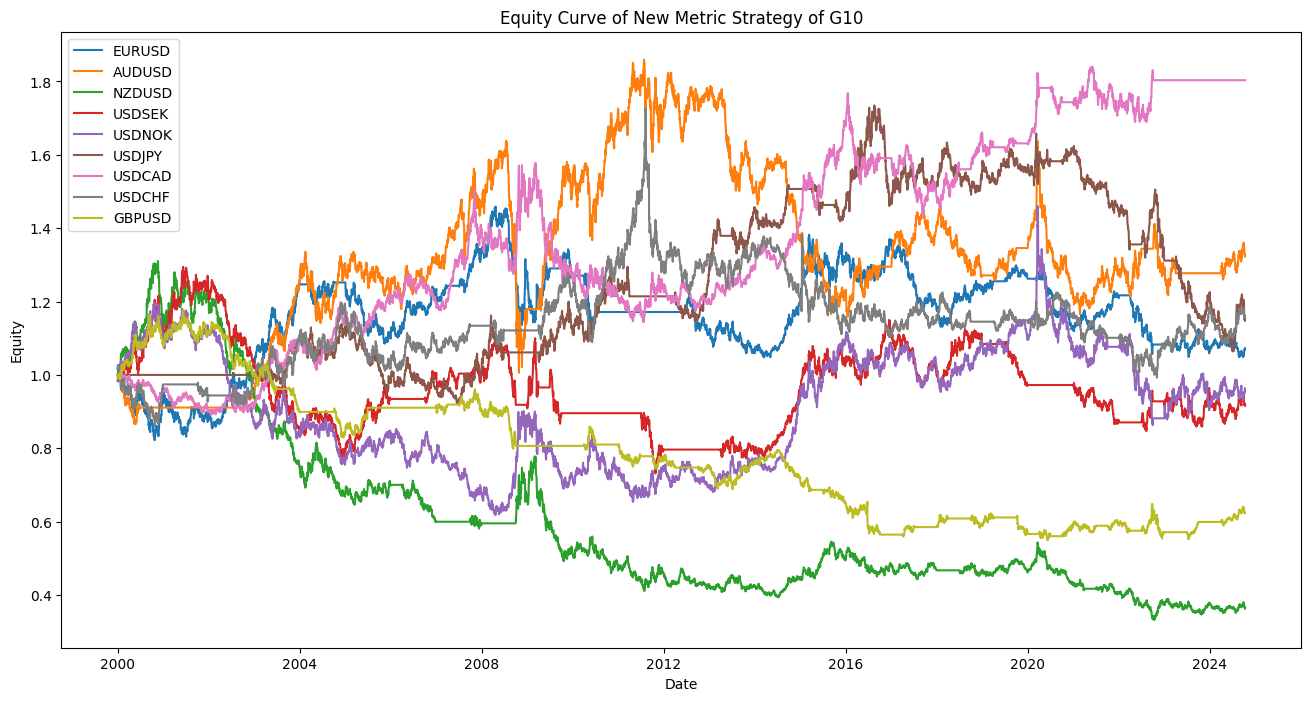

In [ ]:
g10_backtest_neo_metrics(neo_metrics_df, 0.2, fx_names, figsize=(16,8))

# Part 5, 682

**STAT 682:**

**Repeat step 4 but for the more numeric phenomenon of trend. I have provided a series 1 for training and series 2 for out of sample testing.  Please research and develop on 1 and then plug 2 in for one run at the end.  The same notes are on where grading will come from above.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


series_data = pd.read_excel('MP2.Data.From.BBG.xlsx', sheet_name='686Trend')
series_data.columns = ['Date', 'Series 1', 'Series 2']
series_data['Date'] = pd.to_datetime(series_data['Date'])
series_data = series_data.sort_values('Date').set_index('Date')

# split training and testing data
series_1 = series_data[['Series 1']].rename(columns={'Series 1': 'Price'}).copy()
series_2 = series_data[['Series 2']].rename(columns={'Series 2': 'Price'}).copy()

series_1.head(), series_2.head()

(                 Price
 Date                  
 2000-01-03  100.000000
 2000-01-04   99.402575
 2000-01-05   98.867077
 2000-01-06   98.908035
 2000-01-07   98.592429,
                  Price
 Date                  
 2000-01-03  100.000000
 2000-01-04   94.673539
 2000-01-05   94.544673
 2000-01-06   96.091065
 2000-01-07   95.403780)

In [ ]:
# Trend-Based metric (TVI)
def calculate_tvi_adapted(df, momentum_period=14, persistence_window=30, position_window=200):
    # Calculate Momentum for trend strength
    df['Momentum'] = df['Price'].diff(momentum_period)

    # Calculate Trend Persistence (R-squared of a rolling linear regression)
    r_squared_list = []
    for i in range(len(df)):
        if i < persistence_window:
            r_squared_list.append(np.nan)
        else:
            y = df['Price'].iloc[i - persistence_window:i].values.reshape(-1, 1)
            X = np.arange(persistence_window).reshape(-1, 1)
            model = LinearRegression().fit(X, y)
            r_squared = model.score(X, y)
            r_squared_list.append(r_squared)
    df['Trend_Persistence'] = r_squared_list

    # Calculate Price Position relative to a long-term moving average
    df['SMA_long'] = df['Price'].rolling(window=position_window).mean()
    df['Price_Position'] = (df['Price'] - df['SMA_long']) / df['SMA_long']

    # Fill NaN values where necessary
    df[['Momentum', 'Trend_Persistence', 'Price_Position']] = df[['Momentum', 'Trend_Persistence', 'Price_Position']].fillna(0)

    # Calculate TVI as a weighted sum of the components
    w1, w2, w3 = 0.33, 0.33, 0.34  # weights for Momentum, Trend Persistence, and Price Position
    df['TVI'] = w1 * df['Momentum'] + w2 * df['Trend_Persistence'] + w3 * df['Price_Position']

    return df

In [ ]:
# Backtesting function using the calculated TVI
def backtest_tvi_strategy(df, buy_threshold=0.5, sell_threshold=-0.5):
    # Generate buy/sell signals based on TVI
    df['signal'] = 0
    df.loc[df['TVI'] > buy_threshold, 'signal'] = 1  # Buy signal
    df.loc[df['TVI'] < sell_threshold, 'signal'] = -1  # Sell signal

    # Calculate returns
    df['price_return'] = df['Price'].pct_change()
    df['strategy_return'] = df['signal'].shift(1) * df['price_return']
    df['equity_curve'] = (1 + df['strategy_return']).cumprod()

    # Plot the equity curve
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=df.index, y='equity_curve', label='Trend-Based Strategy')
    plt.title('Equity Curve of Trend-Based Strategy')
    plt.xlabel('Date')
    plt.ylabel('Equity Curve')
    plt.legend()
    plt.show()

    return df

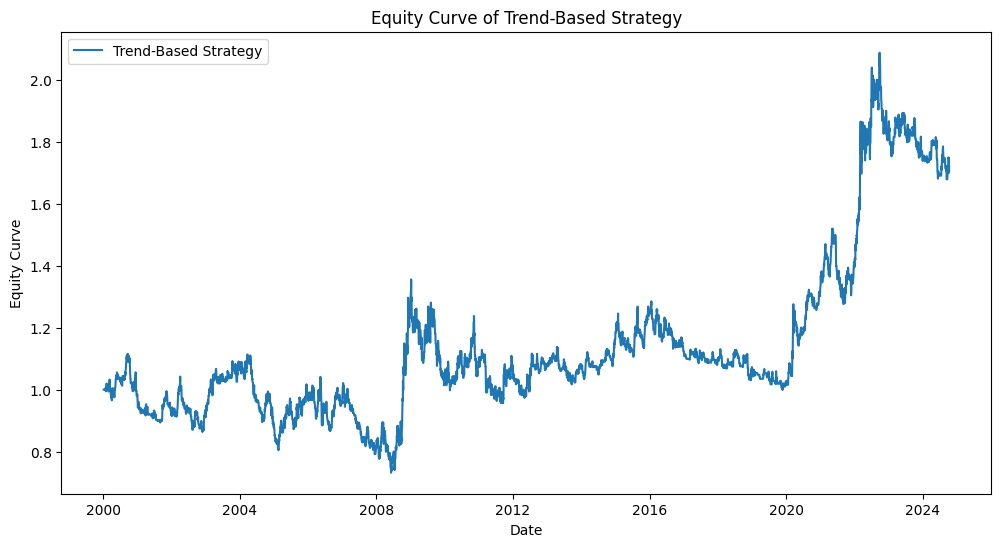

In [ ]:
# Apply TVI Calculation and Backtest on Series 1 (Training Data)
series_1_tvi = calculate_tvi_adapted(series_1.copy())
series_1_results = backtest_tvi_strategy(series_1_tvi, buy_threshold=0.5, sell_threshold=-0.5)

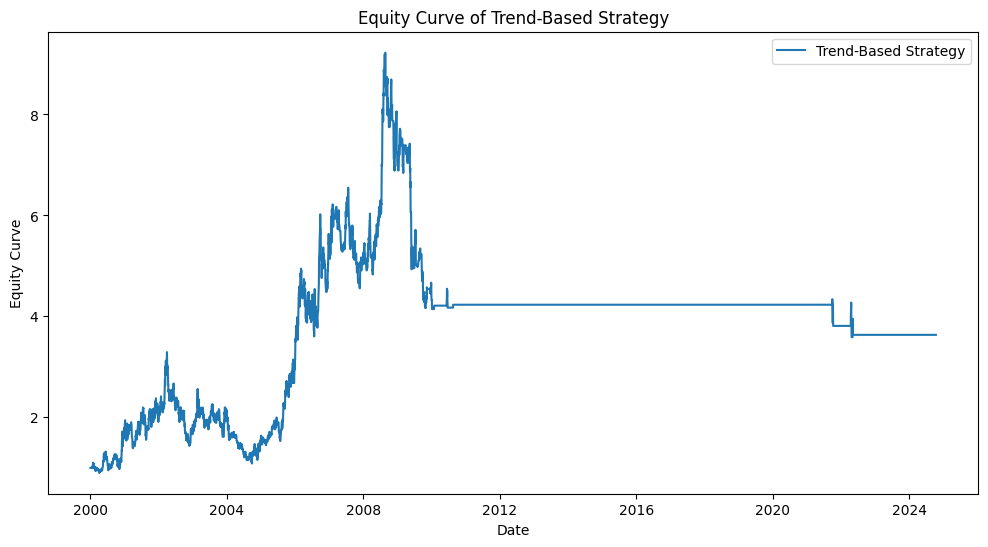

In [ ]:
# Apply TVI Calculation and Backtest on Series 2 (Out-of-Sample Testing)
series_2_tvi = calculate_tvi_adapted(series_2.copy())
series_2_results = backtest_tvi_strategy(series_2_tvi, buy_threshold=0.5, sell_threshold=-0.5)